<a href="https://colab.research.google.com/github/luisbendez/Business-Predictive-Analytics_Clinica-Mayo/blob/main/Business_Predictive_Analytics_Clinica_Mayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

from IPython.display import display

In [ ]:
#Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CARGA DE DATOS

In [ ]:
# Cargar el DataFrame desde el archivo CSV
df_heart_disease_dirty5 = pd.read_csv("/content/drive/My Drive/BPA/TP/heart_disease_dirty5.csv", encoding='ISO-8859-1', delimiter=";")

# Ordenar filas y columnas
df_heart_disease_dirty5 = df_heart_disease_dirty5.sort_index(axis=0).sort_index(axis=1)

# Mostrar las primeras filas del DataFrame ordenado
df_heart_disease_dirty5.head(5)

BMI BPMeds  Gender Heart_ stroke    age cigsPerDay  currentSmoker  diaBP  \
0  26.97      0    Male            No 39.000          0          0.000 70.000   
1    NaN    NaN     NaN           NaN    NaN        NaN            NaN    NaN   
2  25.34      0    Male            No 48.000         20          1.000 80.000   
3  28.58      0  Female           yes 61.000         30          1.000 95.000   
4   23.1      0  Female            No 46.000         23          1.000 84.000   

   diabetes     education glucose  heartRate  prevalentHyp prevalentStroke  \
0     0.000  postgraduate      77     80.000         0.000              no   
1       NaN           NaN     NaN        NaN           NaN             NaN   
2     0.000    uneducated      70     75.000         0.000              no   
3     0.000      graduate     103     65.000         1.000              no   
4     0.000      graduate      85     85.000         0.000              no   

    sysBP totChol  
0 106.000     195  
1     NaN     NaN  
2 127.500     245  
3 150.000     225  
4 130.000     285

CORRECCIÓN DE CABECERAS O HEADERS

In [ ]:
columnas_renombrar =  {'BPMeds':'blood_pressure_medications','BMI':'body_mass_index','Gender':'gender','Heart_ stroke':'heart_disease','cigsPerDay':'cigarettes_per_day','currentSmoker':'is_current_smoker','diaBP':'diastolic_blood_pressure','prevalentHyp':'hypertension','prevalentStroke':'has_prevalent_stroke','sysBP':'systolic_blood_pressure','totChol':'total_cholesterol'}
df_heart_disease_dirty5.rename(columns = columnas_renombrar, inplace = True)

In [ ]:
df_heart_disease_dirty5.head(3)

body_mass_index blood_pressure_medications gender heart_disease    age  \
0           26.97                          0   Male            No 39.000   
1             NaN                        NaN    NaN           NaN    NaN   
2           25.34                          0   Male            No 48.000   

  cigarettes_per_day  is_current_smoker  diastolic_blood_pressure  diabetes  \
0                  0              0.000                    70.000     0.000   
1                NaN                NaN                       NaN       NaN   
2                 20              1.000                    80.000     0.000   

      education glucose  heartRate  hypertension has_prevalent_stroke  \
0  postgraduate      77     80.000         0.000                   no   
1           NaN     NaN        NaN           NaN                  NaN   
2    uneducated      70     75.000         0.000                   no   

   systolic_blood_pressure total_cholesterol  
0                  106.000               195  
1                      NaN               NaN  
2                  127.500               245

DUPLICADOS

In [ ]:
df_heart_disease_dirty5.duplicated().sum()

363

In [ ]:
# Identificar filas duplicadas en el DataFrame
filas_duplicadas = df_heart_disease_dirty5[df_heart_disease_dirty5.duplicated()]

# Mostrar las filas duplicadas
print(filas_duplicadas)

     body_mass_index blood_pressure_medications  gender heart_disease    age  \
15               NaN                        NaN     NaN           NaN    NaN   
34               NaN                        NaN     NaN           NaN    NaN   
43               NaN                        NaN     NaN           NaN    NaN   
180              NaN                        NaN     NaN           NaN    NaN   
184              NaN                        NaN     NaN           NaN    NaN   
...              ...                        ...     ...           ...    ...   
4410           29.48                          0    MALE            NO 43.000   
4411             NaN                        NaN     NaN           NaN    NaN   
4412           25.63                          0    Male            No 41.000   
4413           25.46                          0  Female            No 46.000   
4414           24.01                          0    Male            No 39.000   

     cigarettes_per_day  is_current_smo

In [ ]:
#Corrección: Eliminar las filas duplicadas
df_heart_disease_dirty5.drop_duplicates(inplace=True)
df_heart_disease_dirty5.shape

(4052, 16)

VERIFICACIÓN DE VALORES NULOS EN DATASET

In [ ]:
df_cat = df_heart_disease_dirty5.select_dtypes(include=['object']).copy()
df_cat

body_mass_index blood_pressure_medications  gender heart_disease  \
0              26.97                          0    Male            No   
1                NaN                        NaN     NaN           NaN   
2              25.34                          0    Male            No   
3              28.58                          0  Female           yes   
4               23.1                          0  Female            No   
...              ...                        ...     ...           ...   
4200           25.97                          0    Male           yes   
4201           19.71                          0    MALE            NO   
4202              22                        NaN  Female            No   
4203           19.16                          0  Female            No   
4204           21.47                          0  Female            No   

     cigarettes_per_day      education glucose has_prevalent_stroke  \
0                     0   postgraduate      77                   no   
1                   NaN            NaN     NaN                  NaN   
2                    20     uneducated      70                   no   
3                    30       graduate     103                   no   
4                    23       graduate      85                   no   
...                 ...            ...     ...                  ...   
4200                  1     uneducated      86                   no   
4201                 43       GRADUATE      68                   NO   
4202                 20  primaryschool      86                   no   
4203                 15     uneducated     NaN                   no   
4204                  0  primaryschool     107                   no   

     total_cholesterol  
0                  195  
1                  NaN  
2                  245  
3                  225  
4                  285  
...                ...  
4200               313  
4201               207  
4202               248  
4203               210  
4204               269  

[4052 rows x 9 columns]

In [ ]:
#df_cat.isna().sum().sort_values(ascending=False)
df_cat.isnull().sum().sort_values(ascending=False)

glucose                       381
education                     127
blood_pressure_medications     82
total_cholesterol              82
cigarettes_per_day             60
body_mass_index                53
heart_disease                  37
has_prevalent_stroke           37
gender                          1
dtype: int64

In [ ]:
df_cat.isnull().sum().sort_values(ascending=False) * 100 / len(df_cat)

glucose                      9.403
education                    3.134
blood_pressure_medications   2.024
total_cholesterol            2.024
cigarettes_per_day           1.481
body_mass_index              1.308
heart_disease                0.913
has_prevalent_stroke         0.913
gender                       0.025
dtype: float64

In [ ]:
# Eliminar filas que contienen valores nulos
df_cat.dropna(inplace=True)

# Verificar si quedan valores nulos después de la eliminación
df_cat.isnull().sum().sort_values(ascending=False) * 100 / len(df_cat)


body_mass_index              0.000
blood_pressure_medications   0.000
gender                       0.000
heart_disease                0.000
cigarettes_per_day           0.000
education                    0.000
glucose                      0.000
has_prevalent_stroke         0.000
total_cholesterol            0.000
dtype: float64

In [ ]:
# Verificar si quedan valores nulos después de la eliminación
df_cat.isnull().sum().sort_values(ascending=False) * 100 / len(df_cat)

body_mass_index              0.000
blood_pressure_medications   0.000
gender                       0.000
heart_disease                0.000
cigarettes_per_day           0.000
education                    0.000
glucose                      0.000
has_prevalent_stroke         0.000
total_cholesterol            0.000
dtype: float64

In [ ]:
df_num = df_heart_disease_dirty5.select_dtypes(include='number').copy()

In [ ]:
print(df_num.shape)
df_num.isna().sum().sort_values(ascending=False)

(4052, 7)


heartRate                   38
age                         37
is_current_smoker           37
diastolic_blood_pressure    37
diabetes                    37
hypertension                37
systolic_blood_pressure     37
dtype: int64

In [ ]:
#Analizamos con estadísticos básicos como se comporta el promedio y la media
df_num.describe().T

count    mean    std    min     25%     50%  \
age                      4015.000  49.552  8.561 32.000  42.000  49.000   
is_current_smoker        4015.000   0.496  0.500  0.000   0.000   0.000   
diastolic_blood_pressure 4015.000  82.873 11.839 48.000  75.000  82.000   
diabetes                 4015.000   0.026  0.159  0.000   0.000   0.000   
heartRate                4014.000  75.944 12.015 44.000  68.000  75.000   
hypertension             4015.000   0.308  0.462  0.000   0.000   0.000   
systolic_blood_pressure  4015.000 132.265 21.869 83.500 117.000 128.000   

                             75%     max  
age                       56.000  70.000  
is_current_smoker          1.000   1.000  
diastolic_blood_pressure  89.500 142.500  
diabetes                   0.000   1.000  
heartRate                 83.000 143.000  
hypertension               1.000   1.000  
systolic_blood_pressure  143.500 295.000

In [ ]:
valor_heartRate  = df_num['heartRate'].median()
valor_age    = df_num['age'].median()
valor_is_current_smoker    = df_num['is_current_smoker'].median()
valor_hypertension    = df_num['hypertension'].median()
valor_diabetes    = df_num['diabetes'].median()
valor_systolic_blood_pressure    = df_num['systolic_blood_pressure'].median()
valor_diastolic_blood_pressure    = df_num['diastolic_blood_pressure'].median()

print(valor_heartRate)
print(valor_age)
print(valor_is_current_smoker)
print(valor_hypertension)
print(valor_diabetes)
print(valor_systolic_blood_pressure)
print(valor_diastolic_blood_pressure)

75.0
49.0
0.0
0.0
0.0
128.0
82.0


In [ ]:
df_num['heartRate']  = df_num['heartRate'].fillna(valor_heartRate)
df_num['age']    = df_num['age'].fillna(valor_age)
df_num['is_current_smoker']  = df_num['is_current_smoker'].fillna(valor_is_current_smoker)
df_num['hypertension']    = df_num['hypertension'].fillna(valor_hypertension)
df_num['diabetes']  = df_num['diabetes'].fillna(valor_diabetes)
df_num['systolic_blood_pressure']    = df_num['systolic_blood_pressure'].fillna(valor_systolic_blood_pressure)
df_num['diastolic_blood_pressure']  = df_num['diastolic_blood_pressure'].fillna(valor_diastolic_blood_pressure)

In [ ]:
df_num.isna().sum().sort_values(ascending=False)

age                         0
is_current_smoker           0
diastolic_blood_pressure    0
diabetes                    0
heartRate                   0
hypertension                0
systolic_blood_pressure     0
dtype: int64

CORRECCIONES ADICIONALES

Verificación de Valores Nulos y Variantes:

In [ ]:
# Verificar valores nulos y sus variantes en el DataFrame
def verificar_valores_nulos(df):
    print("Recuento de valores nulos por columna:")
    print(df.isnull().sum())
    print("\nRecuento de 'NA', 'N/A', y espacios en blanco por columna:")
    variantes_nulas = ['NA', 'N/A', 'na', '', ' ']
    for variante in variantes_nulas:
        print(f"Recuento de '{variante}': {(df == variante).sum()}")

# Llamar a la función de verificación con el DataFrame
verificar_valores_nulos(df_num)


Recuento de valores nulos por columna:
age                         0
is_current_smoker           0
diastolic_blood_pressure    0
diabetes                    0
heartRate                   0
hypertension                0
systolic_blood_pressure     0
dtype: int64

Recuento de 'NA', 'N/A', y espacios en blanco por columna:
Recuento de 'NA': age                         0
is_current_smoker           0
diastolic_blood_pressure    0
diabetes                    0
heartRate                   0
hypertension                0
systolic_blood_pressure     0
dtype: int64
Recuento de 'N/A': age                         0
is_current_smoker           0
diastolic_blood_pressure    0
diabetes                    0
heartRate                   0
hypertension                0
systolic_blood_pressure     0
dtype: int64
Recuento de 'na': age                         0
is_current_smoker           0
diastolic_blood_pressure    0
diabetes                    0
heartRate                   0
hypertension               

In [ ]:
# Verificar valores nulos y sus variantes en el DataFrame
def verificar_valores_nulos(df):
    print("Recuento de valores nulos por columna:")
    print(df.isnull().sum())
    print("\nRecuento de 'NA', 'N/A', y espacios en blanco por columna:")
    variantes_nulas = ['NA', 'N/A', 'na', '', ' ']
    for variante in variantes_nulas:
        print(f"Recuento de '{variante}': {(df == variante).sum()}")

# Llamar a la función de verificación con el DataFrame
verificar_valores_nulos(df_cat)

Recuento de valores nulos por columna:
body_mass_index               0
blood_pressure_medications    0
gender                        0
heart_disease                 0
cigarettes_per_day            0
education                     0
glucose                       0
has_prevalent_stroke          0
total_cholesterol             0
dtype: int64

Recuento de 'NA', 'N/A', y espacios en blanco por columna:
Recuento de 'NA': body_mass_index               0
blood_pressure_medications    0
gender                        0
heart_disease                 0
cigarettes_per_day            0
education                     0
glucose                       0
has_prevalent_stroke          0
total_cholesterol             0
dtype: int64
Recuento de 'N/A': body_mass_index               0
blood_pressure_medications    0
gender                        0
heart_disease                 0
cigarettes_per_day            0
education                     0
glucose                       0
has_prevalent_stroke          0
total_

Corrección de Valores Nulos y Variantes:

In [ ]:
# Corregir valores nulos y sus variantes en el DataFrame
def corregir_valores_nulos(df):
    variantes_nulas = ['NA', 'N/A', 'na', '', ' ']
    for variante in variantes_nulas:
        df.replace(variante, pd.NA, inplace=True)  # Reemplaza con un NA que pandas puede manejar mejor
    df.dropna(inplace=True)  # Opcional: eliminar filas con valores NA si necesario

# Llamar a la función de corrección con el DataFrame
corregir_valores_nulos(df_cat)


In [ ]:
# Corregir valores nulos y sus variantes en el DataFrame
def corregir_valores_nulos(df):
    variantes_nulas = ['NA', 'N/A', 'na', '', ' ']
    for variante in variantes_nulas:
        df.replace(variante, pd.NA, inplace=True)  # Reemplaza con un NA que pandas puede manejar mejor
    df.dropna(inplace=True)  # Opcional: eliminar filas con valores NA si necesario

# Llamar a la función de corrección con el DataFrame
corregir_valores_nulos(df_num)

Verificación de Inconsistencias Textuales:

In [ ]:
# Verificar inconsistencias textuales en datos de tipo string
def verificar_textos(df):
    for column in df.select_dtypes(include=['object']).columns:
        print(f"\nVerificación en columna '{column}':")
        print(f"Valores en mayúsculas: {df[column][df[column].str.isupper()].unique()}")
        print(f"Valores en minúsculas: {df[column][df[column].str.islower()].unique()}")

# Llamar a la función de verificación de textos
verificar_textos(df_cat)



Verificación en columna 'body_mass_index':
Valores en mayúsculas: []
Valores en minúsculas: []

Verificación en columna 'blood_pressure_medications':
Valores en mayúsculas: []
Valores en minúsculas: []

Verificación en columna 'gender':
Valores en mayúsculas: ['FEMALE' 'MALE']
Valores en minúsculas: ['male' 'female']

Verificación en columna 'heart_disease':
Valores en mayúsculas: ['YES' 'NO']
Valores en minúsculas: ['yes' 'no']

Verificación en columna 'cigarettes_per_day':
Valores en mayúsculas: []
Valores en minúsculas: []

Verificación en columna 'education':
Valores en mayúsculas: ['PRIMARYSCHOOL' 'UNEDUCATED' 'GRADUATE' 'POSTGRADUATE']
Valores en minúsculas: ['postgraduate' 'uneducated' 'graduate' 'primaryschool']

Verificación en columna 'glucose':
Valores en mayúsculas: []
Valores en minúsculas: []

Verificación en columna 'has_prevalent_stroke':
Valores en mayúsculas: ['NO' 'YES']
Valores en minúsculas: ['no' 'yes']

Verificación en columna 'total_cholesterol':
Valores en may

Corrección de Inconsistencias Textuales:

In [ ]:
# Corregir inconsistencias textuales en datos de tipo string
def corregir_textos(df):
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].str.title()  # Convertir a formato Título para uniformidad

# Llamar a la función de corrección de textos
corregir_textos(df_cat)


In [ ]:
df_cat.dropna(inplace=True)
df_num.dropna(inplace=True)

In [ ]:
df_cat_num = pd.concat([df_cat,df_num], axis =1 ) #concatenar los dos dataframe, con las variables de posicion
df_cat_num.dropna(inplace=True)
df_cat_num

body_mass_index blood_pressure_medications  gender heart_disease  \
0              26.97                          0    Male            No   
2              25.34                          0    Male            No   
3              28.58                          0  Female           Yes   
4               23.1                          0  Female            No   
5               30.3                          0  Female            No   
...              ...                        ...     ...           ...   
4198           24.96                          0    Male            No   
4199           23.14                          0    Male           Yes   
4200           25.97                          0    Male           Yes   
4201           19.71                          0    Male            No   
4204           21.47                          0  Female            No   

     cigarettes_per_day      education glucose has_prevalent_stroke  \
0                     0   Postgraduate      77                   No   
2                    20     Uneducated      70                   No   
3                    30       Graduate     103                   No   
4                    23       Graduate      85                   No   
5                     0  Primaryschool      99                   No   
...                 ...            ...     ...                  ...   
4198                  0       Graduate      81                   No   
4199                  0     Uneducated      79                   No   
4200                  1     Uneducated      86                   No   
4201                 43       Graduate      68                   No   
4204                  0  Primaryschool     107                   No   

     total_cholesterol    age  is_current_smoker  diastolic_blood_pressure  \
0                  195 39.000              0.000                    70.000   
2                  245 48.000              1.000                    80.000   
3                  225 61.000              1.000                    95.000   
4                  285 46.000              1.000                    84.000   
5                  228 43.000              0.000                   110.000   
...                ...    ...                ...                       ...   
4198               187 58.000              0.000                    81.000   
4199               176 68.000              0.000                    97.000   
4200               313 50.000              1.000                    92.000   
4201               207 51.000              1.000                    80.000   
4204               269 52.000              0.000                    83.000   

      diabetes  heartRate  hypertension  systolic_blood_pressure  
0        0.000     80.000         0.000                  106.000  
2        0.000     75.000         0.000                  127.500  
3        0.000     65.000         1.000                  150.000  
4        0.000     85.000         0.000                  130.000  
5        0.000     77.000         1.000                  180.000  
...        ...        ...           ...                      ...  
4198     0.000     80.000         1.000                  141.000  
4199     0.000     60.000         1.000                  168.000  
4200     0.000     66.000         1.000                  179.000  
4201     0.000     65.000         0.000                  126.500  
4204     0.000     80.000         0.000                  133.500  

[3461 rows x 16 columns]

GRABAR FIN DE FASE

In [ ]:
df_cat.to_pickle('/content/drive/My Drive/BPA/TP/df_heart_disease_cat_fin_quality_cleaning.pickle')
df_num.to_pickle('/content/drive/My Drive/BPA/TP/df_heart_disease_num_fin_quality_cleaning.pickle')
df_cat_num.to_pickle('/content/drive/My Drive/BPA/TP/df_heart_disease_cat_num_fin_quality_cleaning.pickle')

**EDA**

In [ ]:
df_cat = pd.read_pickle('/content/drive/My Drive/BPA/TP/df_heart_disease_cat_fin_quality_cleaning.pickle')
df_num = pd.read_pickle('/content/drive/My Drive/BPA/TP/df_heart_disease_num_fin_quality_cleaning.pickle')
df_cat_num = pd.read_pickle('/content/drive/My Drive/BPA/TP/df_heart_disease_cat_num_fin_quality_cleaning.pickle')

In [ ]:
df_cat.head(5)

body_mass_index blood_pressure_medications  gender heart_disease  \
0           26.97                          0    Male            No   
2           25.34                          0    Male            No   
3           28.58                          0  Female           Yes   
4            23.1                          0  Female            No   
5            30.3                          0  Female            No   

  cigarettes_per_day      education glucose has_prevalent_stroke  \
0                  0   Postgraduate      77                   No   
2                 20     Uneducated      70                   No   
3                 30       Graduate     103                   No   
4                 23       Graduate      85                   No   
5                  0  Primaryschool      99                   No   

  total_cholesterol  
0               195  
2               245  
3               225  
4               285  
5               228

In [ ]:
df_num.head(5)

age  is_current_smoker  diastolic_blood_pressure  diabetes  heartRate  \
0 39.000              0.000                    70.000     0.000     80.000   
1 49.000              0.000                    82.000     0.000     75.000   
2 48.000              1.000                    80.000     0.000     75.000   
3 61.000              1.000                    95.000     0.000     65.000   
4 46.000              1.000                    84.000     0.000     85.000   

   hypertension  systolic_blood_pressure  
0         0.000                  106.000  
1         0.000                  128.000  
2         0.000                  127.500  
3         1.000                  150.000  
4         0.000                  130.000

In [ ]:
df_cat_num.head(5)

body_mass_index blood_pressure_medications  gender heart_disease  \
0           26.97                          0    Male            No   
2           25.34                          0    Male            No   
3           28.58                          0  Female           Yes   
4            23.1                          0  Female            No   
5            30.3                          0  Female            No   

  cigarettes_per_day      education glucose has_prevalent_stroke  \
0                  0   Postgraduate      77                   No   
2                 20     Uneducated      70                   No   
3                 30       Graduate     103                   No   
4                 23       Graduate      85                   No   
5                  0  Primaryschool      99                   No   

  total_cholesterol    age  is_current_smoker  diastolic_blood_pressure  \
0               195 39.000              0.000                    70.000   
2               245 48.000              1.000                    80.000   
3               225 61.000              1.000                    95.000   
4               285 46.000              1.000                    84.000   
5               228 43.000              0.000                   110.000   

   diabetes  heartRate  hypertension  systolic_blood_pressure  
0     0.000     80.000         0.000                  106.000  
2     0.000     75.000         0.000                  127.500  
3     0.000     65.000         1.000                  150.000  
4     0.000     85.000         0.000                  130.000  
5     0.000     77.000         1.000                  180.000

1.	¿Cuál es la distribución de la edad de los pacientes en el conjunto de datos?

DISTRIBUCIÓN DE LA EDAD DE LOS PACIENTES

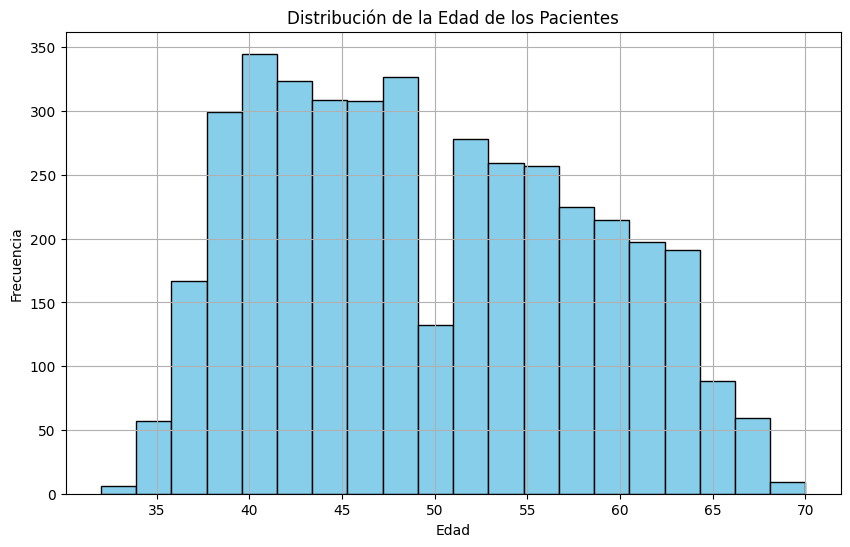

In [ ]:
import matplotlib.pyplot as plt
# Cargar el DataFrame desde el archivo CSV

edad_pacientes = df_num['age']

plt.figure(figsize=(10, 6))
plt.hist(edad_pacientes, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

2.	¿Cuál es la distribución del índice de masa corporal (BMI) en la población?

DISPERSIÓN ENTRE EDAD Y ÍNDICE DE MASA CORPORAL

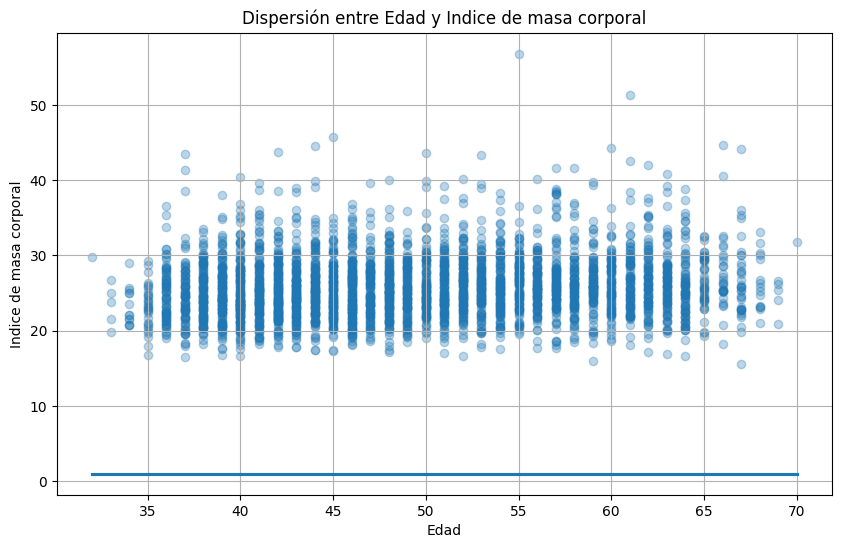

In [ ]:
import seaborn as sns
df_cat_num['body_mass_index'] = pd.to_numeric(df_cat_num['body_mass_index'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='body_mass_index', data=df_cat_num, logistic=True, scatter_kws={'alpha':0.3})
plt.title('Dispersión entre Edad y Indice de masa corporal')
plt.xlabel('Edad')
plt.ylabel('Indice de masa corporal')
plt.grid(True)
plt.show()

3.	¿Cómo se distribuyen los niveles de presión arterial sistólica y diastólica?

DISTRIBUCIÓN DE PRESIÓN ARTERIAL SISTÓLICA Y DIASTÓLICA

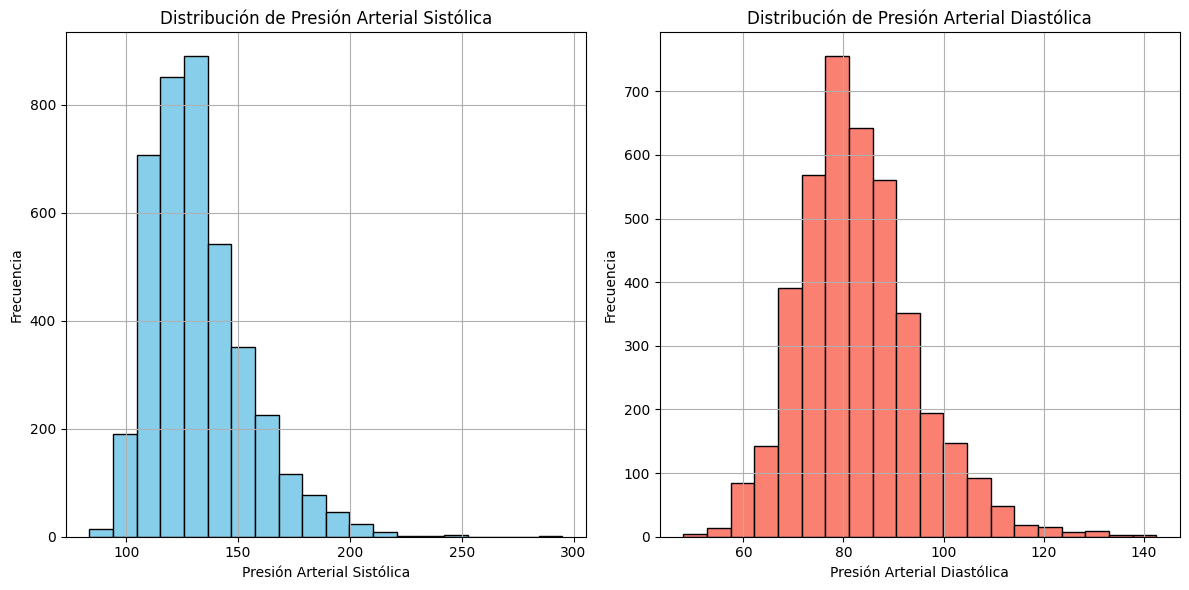

In [ ]:
import matplotlib.pyplot as plt


presion_sistolica = df_num['systolic_blood_pressure']
presion_diastolica = df_num['diastolic_blood_pressure']


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(presion_sistolica, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Presión Arterial Sistólica')
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(presion_diastolica, bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Presión Arterial Diastólica')
plt.xlabel('Presión Arterial Diastólica')
plt.ylabel('Frecuencia')
plt.grid(True)


plt.tight_layout()
plt.show()

4.	¿Hay alguna correlación entre el género de los pacientes y la prevalencia de enfermedades cardiovasculares?

RELACIÓN ENTRE PRESIÓN ARTERIAL SISTÓLICA Y DIASTÓLICA EN HOMBRES Y MUJERES

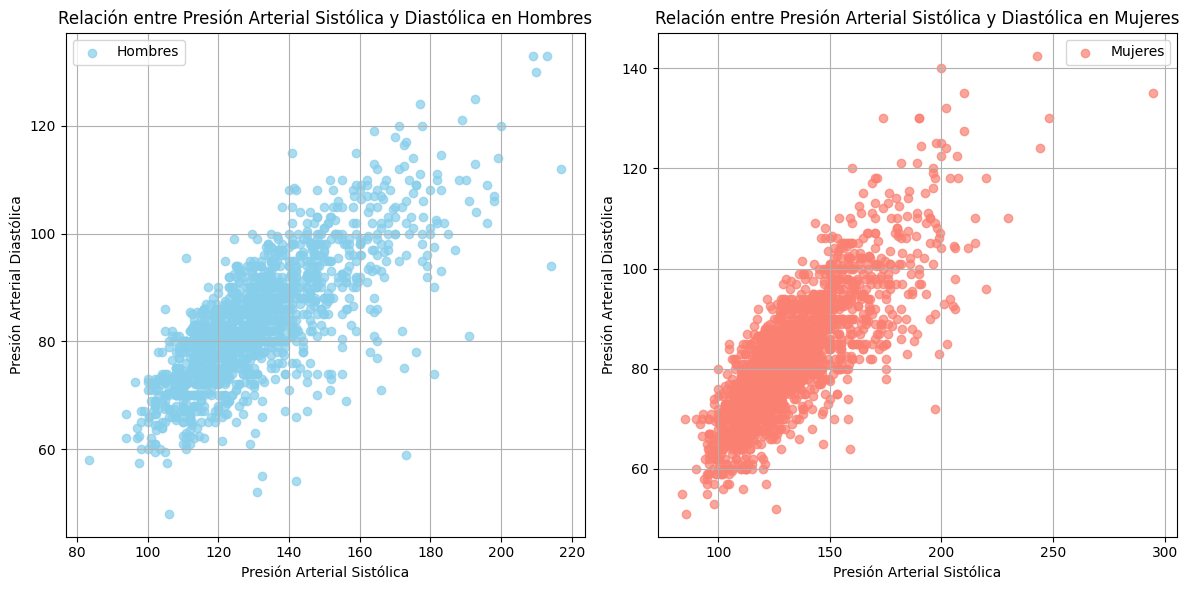

In [ ]:
import matplotlib.pyplot as plt

# Filtrar datos por género
df_male = df_cat_num[df_cat_num['gender'] == 'Male']
df_female = df_cat_num[df_cat_num['gender'] == 'Female']

plt.figure(figsize=(12, 6))

# Gráfico de dispersión para la relación entre presión arterial sistólica y diastólica en hombres
plt.subplot(1, 2, 1)
plt.scatter(df_male['systolic_blood_pressure'], df_male['diastolic_blood_pressure'], color='skyblue', label='Hombres', alpha=0.7)
plt.title('Relación entre Presión Arterial Sistólica y Diastólica en Hombres')
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Presión Arterial Diastólica')
plt.legend()
plt.grid(True)

# Gráfico de dispersión para la relación entre presión arterial sistólica y diastólica en mujeres
plt.subplot(1, 2, 2)
plt.scatter(df_female['systolic_blood_pressure'], df_female['diastolic_blood_pressure'], color='salmon', label='Mujeres', alpha=0.7)
plt.title('Relación entre Presión Arterial Sistólica y Diastólica en Mujeres')
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Presión Arterial Diastólica')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

5.	¿Qué género tiene mayores niveles de glucosa en la sangre?

DISTRIBUCIÓN DE LOS NIVELES DE GLUCOSA

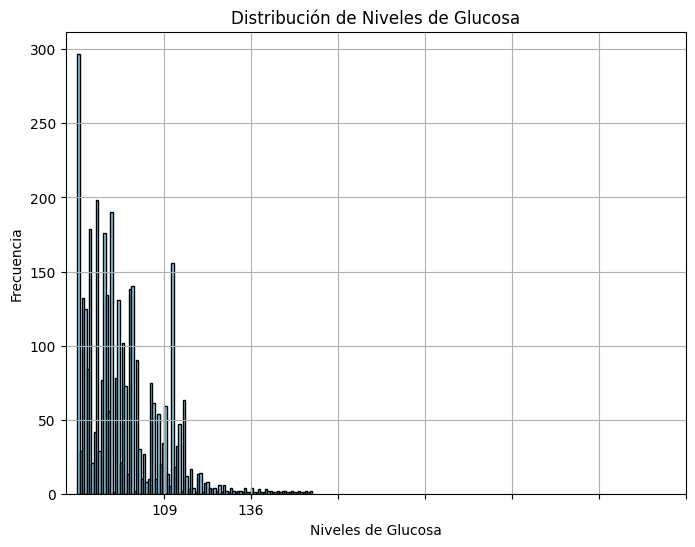

In [ ]:
import numpy as np
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el histograma de los niveles de glucosa
plt.hist(df_cat['glucose'], bins=100, color='skyblue', edgecolor='black')
plt.grid(True)

# Agregar etiquetas y título al gráfico
plt.xlabel('Niveles de Glucosa')
plt.ylabel('Frecuencia')
plt.title('Distribución de Niveles de Glucosa')
plt.xticks(np.arange(50, 400, 50))

# Mostrar el gráfico
plt.show()

6.	¿Cuántos cigarrillos consumidos por día afectan el nivel acelerado del ritmo cardíaco?

DISTRIBUCIÓN DE RITMOS CARDÍACOS

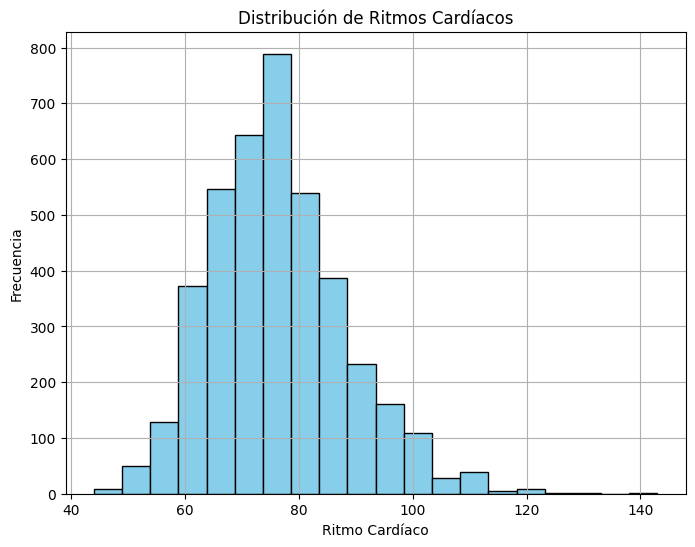

In [ ]:
# Eliminar filas con valores faltantes en la columna 'heartRate' y convertir a tipo numérico
df_cleaned = df_num.dropna(subset=['heartRate'])
df_cleaned['heartRate'] = pd.to_numeric(df_cleaned['heartRate'], errors='coerce')

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el histograma de los ritmos cardíacos
plt.hist(df_cleaned['heartRate'], bins=20, color='skyblue', edgecolor='black')

# Agregar cuadrículas al gráfico
plt.grid(True)

# Agregar etiquetas y título al gráfico
plt.xlabel('Ritmo Cardíaco')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ritmos Cardíacos')

# Mostrar el gráfico
plt.show()

RITMO CARDÍACO SEGÚN INTERVALOS DE CIGARRILLOS POR DÍA

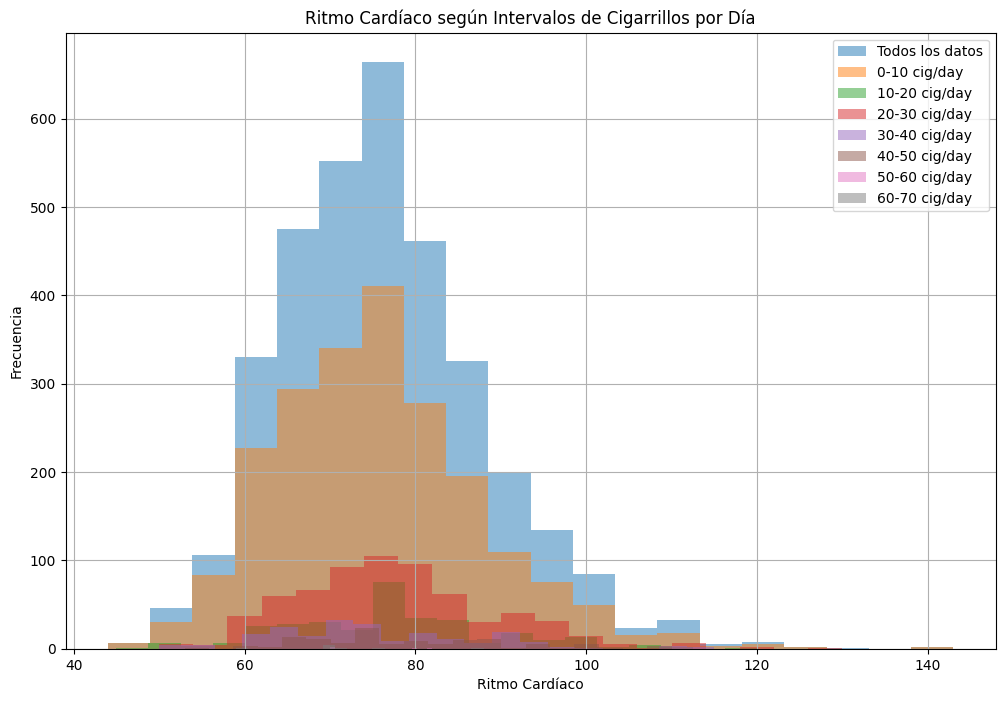

In [ ]:
import numpy as np

# Eliminar filas con valores faltantes en las columnas de interés
df_cleaned = df_cat_num.dropna(subset=['heartRate', 'cigarettes_per_day'])
df_cleaned['heartRate'] = pd.to_numeric(df_cleaned['heartRate'], errors='coerce')
df_cleaned['cigarettes_per_day'] = pd.to_numeric(df_cleaned['cigarettes_per_day'], errors='coerce')

# Definir los intervalos para el número de cigarrillos por día
bins = np.arange(0, df_cleaned['cigarettes_per_day'].max() + 10, 10)  # Intervalos de 0 a máximo + 10, cada 10 cigarrillos

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear histogramas para cada intervalo de cigarrillos por día
plt.hist(df_cleaned['heartRate'], bins=20, alpha=0.5, label='Todos los datos')  # Histograma para todos los datos

for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i + 1]

    # Filtrar datos dentro del intervalo de cigarrillos por día
    subset_data = df_cleaned[(df_cleaned['cigarettes_per_day'] >= lower_bound) & (df_cleaned['cigarettes_per_day'] < upper_bound)]

    # Crear histograma para el subconjunto de datos
    plt.hist(subset_data['heartRate'], bins=20, alpha=0.5, label=f'{lower_bound}-{upper_bound} cig/day')

# Agregar cuadrículas al gráfico
plt.grid(True)

# Agregar etiquetas y título al gráfico
plt.xlabel('Ritmo Cardíaco')
plt.ylabel('Frecuencia')
plt.title('Ritmo Cardíaco según Intervalos de Cigarrillos por Día')
plt.legend()

# Mostrar el gráfico
plt.show()

MATRIZ DE CORRELACIÓN

In [ ]:
df_cat_num

body_mass_index blood_pressure_medications  gender heart_disease  \
0              26.970                          0    Male            No   
2              25.340                          0    Male            No   
3              28.580                          0  Female           Yes   
4              23.100                          0  Female            No   
5              30.300                          0  Female            No   
...               ...                        ...     ...           ...   
4198           24.960                          0    Male            No   
4199           23.140                          0    Male           Yes   
4200           25.970                          0    Male           Yes   
4201           19.710                          0    Male            No   
4204           21.470                          0  Female            No   

     cigarettes_per_day      education glucose has_prevalent_stroke  \
0                     0   Postgraduate      77                   No   
2                    20     Uneducated      70                   No   
3                    30       Graduate     103                   No   
4                    23       Graduate      85                   No   
5                     0  Primaryschool      99                   No   
...                 ...            ...     ...                  ...   
4198                  0       Graduate      81                   No   
4199                  0     Uneducated      79                   No   
4200                  1     Uneducated      86                   No   
4201                 43       Graduate      68                   No   
4204                  0  Primaryschool     107                   No   

     total_cholesterol    age  is_current_smoker  diastolic_blood_pressure  \
0                  195 39.000              0.000                    70.000   
2                  245 48.000              1.000                    80.000   
3                  225 61.000              1.000                    95.000   
4                  285 46.000              1.000                    84.000   
5                  228 43.000              0.000                   110.000   
...                ...    ...                ...                       ...   
4198               187 58.000              0.000                    81.000   
4199               176 68.000              0.000                    97.000   
4200               313 50.000              1.000                    92.000   
4201               207 51.000              1.000                    80.000   
4204               269 52.000              0.000                    83.000   

      diabetes  heartRate  hypertension  systolic_blood_pressure  
0        0.000     80.000         0.000                  106.000  
2        0.000     75.000         0.000                  127.500  
3        0.000     65.000         1.000                  150.000  
4        0.000     85.000         0.000                  130.000  
5        0.000     77.000         1.000                  180.000  
...        ...        ...           ...                      ...  
4198     0.000     80.000         1.000                  141.000  
4199     0.000     60.000         1.000                  168.000  
4200     0.000     66.000         1.000                  179.000  
4201     0.000     65.000         0.000                  126.500  
4204     0.000     80.000         0.000                  133.500  

[3461 rows x 16 columns]

In [ ]:
df_num.corr()

age  is_current_smoker  diastolic_blood_pressure  \
age                       1.000             -0.210                     0.202   
is_current_smoker        -0.210              1.000                    -0.106   
diastolic_blood_pressure  0.202             -0.106                     1.000   
diabetes                  0.101             -0.041                     0.052   
heartRate                -0.009              0.059                     0.181   
hypertension              0.305             -0.098                     0.616   
systolic_blood_pressure   0.389             -0.127                     0.783   

                          diabetes  heartRate  hypertension  \
age                          0.101     -0.009         0.305   
is_current_smoker           -0.041      0.059        -0.098   
diastolic_blood_pressure     0.052      0.181         0.616   
diabetes                     1.000      0.052         0.079   
heartRate                    0.052      1.000         0.150   
hypertension                 0.079      0.150         1.000   
systolic_blood_pressure      0.108      0.184         0.695   

                          systolic_blood_pressure  
age                                         0.389  
is_current_smoker                          -0.127  
diastolic_blood_pressure                    0.783  
diabetes                                    0.108  
heartRate                                   0.184  
hypertension                                0.695  
systolic_blood_pressure                     1.000

<Axes: >

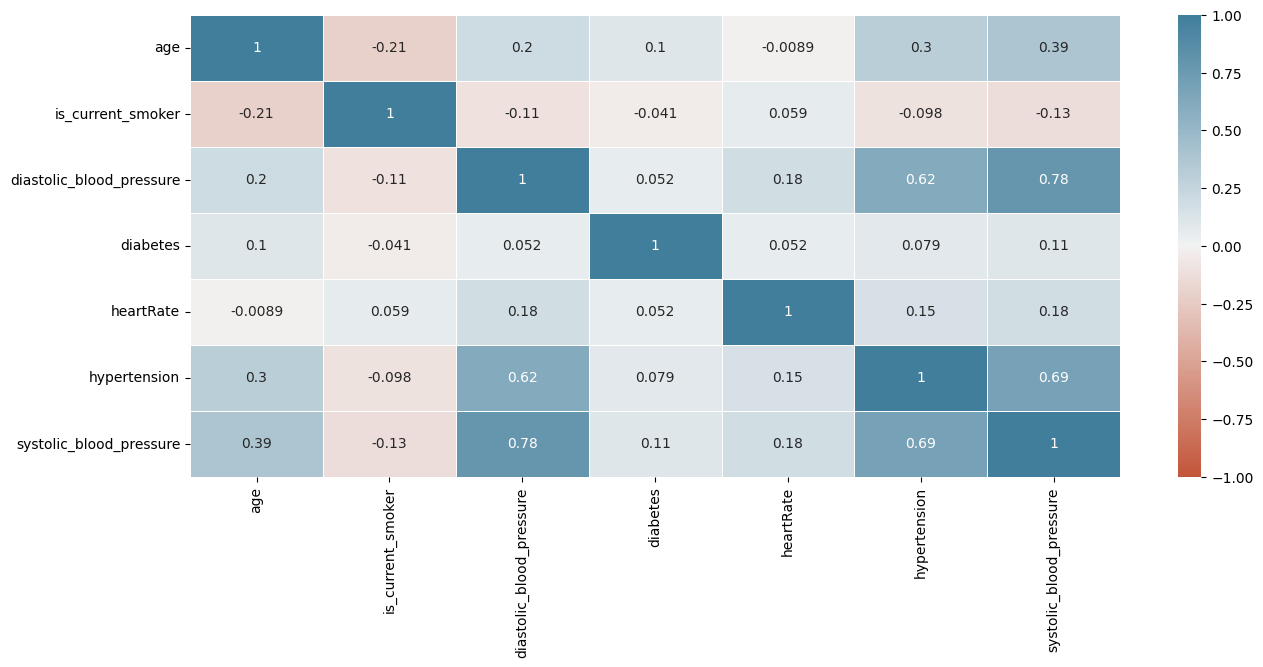

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(
            data = df_num.corr(),
            center = 0,
            vmin = -1,
            vmax = 1,
            linewidths = 0.5,
            cmap = sns.diverging_palette(20,230,as_cmap = True), # porque va de -1 a 1
            annot = True,
            ax = ax
 )

GRABAR FIN DE FASE EDA

In [ ]:
df_cat_num.to_pickle('/content/drive/My Drive/BPA/TP/df_heart_cat_num_fin_EDA.pickle')

**TRANSFORMACIÓN DE LOS DATOS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

pd.options.display.max_columns = None

In [ ]:
df_heart_disease_cleaned = pd.read_pickle('/content/drive/MyDrive/BPA/TP/df_heart_cat_num_fin_EDA.pickle')
df_heart_disease_cleaned.reset_index(inplace = True)
df_heart_disease_cleaned.head(3)

index  body_mass_index blood_pressure_medications  gender heart_disease  \
0      0           26.970                          0    Male            No   
1      2           25.340                          0    Male            No   
2      3           28.580                          0  Female           Yes   

  cigarettes_per_day     education glucose has_prevalent_stroke  \
0                  0  Postgraduate      77                   No   
1                 20    Uneducated      70                   No   
2                 30      Graduate     103                   No   

  total_cholesterol    age  is_current_smoker  diastolic_blood_pressure  \
0               195 39.000              0.000                    70.000   
1               245 48.000              1.000                    80.000   
2               225 61.000              1.000                    95.000   

   diabetes  heartRate  hypertension  systolic_blood_pressure  
0     0.000     80.000         0.000                  106.000  
1     0.000     75.000         0.000                  127.500  
2     0.000     65.000         1.000                  150.000

In [ ]:
df_cat = df_heart_disease_cleaned.select_dtypes(exclude='number').copy()
df_num = df_heart_disease_cleaned.select_dtypes(include='number').copy()

In [ ]:
df_cat

blood_pressure_medications  gender heart_disease cigarettes_per_day  \
0                             0    Male            No                  0   
1                             0    Male            No                 20   
2                             0  Female           Yes                 30   
3                             0  Female            No                 23   
4                             0  Female            No                  0   
...                         ...     ...           ...                ...   
3456                          0    Male            No                  0   
3457                          0    Male           Yes                  0   
3458                          0    Male           Yes                  1   
3459                          0    Male            No                 43   
3460                          0  Female            No                  0   

          education glucose has_prevalent_stroke total_cholesterol  
0      Postgraduate      77                   No               195  
1        Uneducated      70                   No               245  
2          Graduate     103                   No               225  
3          Graduate      85                   No               285  
4     Primaryschool      99                   No               228  
...             ...     ...                  ...               ...  
3456       Graduate      81                   No               187  
3457     Uneducated      79                   No               176  
3458     Uneducated      86                   No               313  
3459       Graduate      68                   No               207  
3460  Primaryschool     107                   No               269  

[3461 rows x 8 columns]

In [ ]:
#convertir variables categóricas en variables oneHotEncoder
columnas = ['gender']
df_cat[columnas]

gender
0       Male
1       Male
2     Female
3     Female
4     Female
...      ...
3456    Male
3457    Male
3458    Male
3459    Male
3460  Female

[3461 rows x 1 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#sparse=True, la salida será una matriz / drop='first: Elimina la primera columna / dtype='int64': Asignamos el tipo de dato entero
oneHE = OneHotEncoder(sparse = False, drop='first', dtype='int64')
df_oneHE = oneHE.fit_transform(df_heart_disease_cleaned[columnas])

df_oneHE = pd.DataFrame(data = df_oneHE , columns=oneHE.get_feature_names_out()) #input_features=cat))
df_oneHE

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


gender_Male
0               1
1               1
2               0
3               0
4               0
...           ...
3456            1
3457            1
3458            1
3459            1
3460            0

[3461 rows x 1 columns]

In [ ]:
columnas = ['education']
df_cat[columnas]

education
0      Postgraduate
1        Uneducated
2          Graduate
3          Graduate
4     Primaryschool
...             ...
3456       Graduate
3457     Uneducated
3458     Uneducated
3459       Graduate
3460  Primaryschool

[3461 rows x 1 columns]

In [ ]:
#convertir variables categóricas en variables dummy
from sklearn.preprocessing import OneHotEncoder

#sparse=True, la salida será una matriz / drop='first: Elimina la primera columna / dtype='int64': Asignamos el tipo de dato entero
oneHE = OneHotEncoder(sparse = False, drop='first', dtype='int64')
df_oneHE = oneHE.fit_transform(df_heart_disease_cleaned[columnas])

df_oneHE = pd.DataFrame(data = df_oneHE , columns=oneHE.get_feature_names_out()) #input_features=cat))
df_oneHE

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


education_Postgraduate  education_Primaryschool  education_Uneducated
0                          1                        0                     0
1                          0                        0                     1
2                          0                        0                     0
3                          0                        0                     0
4                          0                        1                     0
...                      ...                      ...                   ...
3456                       0                        0                     0
3457                       0                        0                     1
3458                       0                        0                     1
3459                       0                        0                     0
3460                       0                        1                     0

[3461 rows x 3 columns]

In [ ]:
columnas = ['has_prevalent_stroke']
df_cat[columnas]

has_prevalent_stroke
0                      No
1                      No
2                      No
3                      No
4                      No
...                   ...
3456                   No
3457                   No
3458                   No
3459                   No
3460                   No

[3461 rows x 1 columns]

In [ ]:
df_heart_disease_cleaned['has_prevalent_stroke'].value_counts()

has_prevalent_stroke
No     3441
Yes      20
Name: count, dtype: int64

In [ ]:
#convertir variables categóricas en variables dummy
from sklearn.preprocessing import OneHotEncoder

#sparse=True, la salida será una matriz / drop='first: Elimina la primera columna / dtype='int64': Asignamos el tipo de dato entero
oneHE = OneHotEncoder(sparse = False, drop='first', dtype='int64')
df_oneHE = oneHE.fit_transform(df_heart_disease_cleaned[columnas])

df_oneHE = pd.DataFrame(data = df_oneHE , columns=oneHE.get_feature_names_out()) #input_features=cat))
df_oneHE

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


has_prevalent_stroke_Yes
0                            0
1                            0
2                            0
3                            0
4                            0
...                        ...
3456                         0
3457                         0
3458                         0
3459                         0
3460                         0

[3461 rows x 1 columns]

In [ ]:
columnas = ['heart_disease']
df_cat[columnas]

heart_disease
0               No
1               No
2              Yes
3               No
4               No
...            ...
3456            No
3457           Yes
3458           Yes
3459            No
3460            No

[3461 rows x 1 columns]

In [ ]:
df_heart_disease_cleaned['heart_disease'].value_counts()

heart_disease
No     2935
Yes     526
Name: count, dtype: int64

In [ ]:
#convertir variables categóricas en variables dummy
from sklearn.preprocessing import OneHotEncoder

#sparse=True, la salida será una matriz / drop='first: Elimina la primera columna / dtype='int64': Asignamos el tipo de dato entero
oneHE = OneHotEncoder(sparse = False, drop='first', dtype='int64')
df_oneHE = oneHE.fit_transform(df_heart_disease_cleaned[columnas])

df_oneHE = pd.DataFrame(data = df_oneHE , columns=oneHE.get_feature_names_out()) #input_features=cat))
df_oneHE

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


heart_disease_Yes
0                     0
1                     0
2                     1
3                     0
4                     0
...                 ...
3456                  0
3457                  1
3458                  1
3459                  0
3460                  0

[3461 rows x 1 columns]

In [ ]:
df_num

index  body_mass_index    age  is_current_smoker  \
0         0           26.970 39.000              0.000   
1         2           25.340 48.000              1.000   
2         3           28.580 61.000              1.000   
3         4           23.100 46.000              1.000   
4         5           30.300 43.000              0.000   
...     ...              ...    ...                ...   
3456   4198           24.960 58.000              0.000   
3457   4199           23.140 68.000              0.000   
3458   4200           25.970 50.000              1.000   
3459   4201           19.710 51.000              1.000   
3460   4204           21.470 52.000              0.000   

      diastolic_blood_pressure  diabetes  heartRate  hypertension  \
0                       70.000     0.000     80.000         0.000   
1                       80.000     0.000     75.000         0.000   
2                       95.000     0.000     65.000         1.000   
3                       84.000     0.000     85.000         0.000   
4                      110.000     0.000     77.000         1.000   
...                        ...       ...        ...           ...   
3456                    81.000     0.000     80.000         1.000   
3457                    97.000     0.000     60.000         1.000   
3458                    92.000     0.000     66.000         1.000   
3459                    80.000     0.000     65.000         0.000   
3460                    83.000     0.000     80.000         0.000   

      systolic_blood_pressure  
0                     106.000  
1                     127.500  
2                     150.000  
3                     130.000  
4                     180.000  
...                       ...  
3456                  141.000  
3457                  168.000  
3458                  179.000  
3459                  126.500  
3460                  133.500  

[3461 rows x 9 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columnas = ['age','blood_pressure_medications','body_mass_index','cigarettes_per_day',
            'diabetes','diastolic_blood_pressure','glucose','heartRate', 'hypertension','is_current_smoker','systolic_blood_pressure','total_cholesterol']

mms = MinMaxScaler()
mms.fit(df_heart_disease_cleaned[columnas])
df_mms = mms.transform(df_heart_disease_cleaned[columnas])

df_mms = pd.DataFrame(data=df_mms, columns=columnas)
df_mms

age  blood_pressure_medications  body_mass_index  cigarettes_per_day  \
0    0.184                       0.000            0.277               0.000   
1    0.421                       0.000            0.238               0.286   
2    0.763                       0.000            0.316               0.429   
3    0.368                       0.000            0.183               0.329   
4    0.289                       0.000            0.358               0.000   
...    ...                         ...              ...                 ...   
3456 0.684                       0.000            0.228               0.000   
3457 0.947                       0.000            0.184               0.000   
3458 0.474                       0.000            0.253               0.014   
3459 0.500                       0.000            0.101               0.614   
3460 0.526                       0.000            0.144               0.000   

      diabetes  diastolic_blood_pressure  glucose  heartRate  hypertension  \
0        0.000                     0.233    0.105      0.364         0.000   
1        0.000                     0.339    0.085      0.313         0.000   
2        0.000                     0.497    0.178      0.212         1.000   
3        0.000                     0.381    0.127      0.414         0.000   
4        0.000                     0.656    0.167      0.333         1.000   
...        ...                       ...      ...        ...           ...   
3456     0.000                     0.349    0.116      0.364         1.000   
3457     0.000                     0.519    0.110      0.162         1.000   
3458     0.000                     0.466    0.130      0.222         1.000   
3459     0.000                     0.339    0.079      0.212         0.000   
3460     0.000                     0.370    0.189      0.364         0.000   

      is_current_smoker  systolic_blood_pressure  total_cholesterol  
0                 0.000                    0.106              0.158  
1                 1.000                    0.208              0.262  
2                 1.000                    0.314              0.220  
3                 1.000                    0.220              0.345  
4                 0.000                    0.456              0.227  
...                 ...                      ...                ...  
3456              0.000                    0.272              0.141  
3457              0.000                    0.400              0.119  
3458              1.000                    0.452              0.403  
3459              1.000                    0.203              0.183  
3460              0.000                    0.236              0.312  

[3461 rows x 12 columns]

In [ ]:
print(df_oneHE)
print(df_mms)

      heart_disease_Yes
0                     0
1                     0
2                     1
3                     0
4                     0
...                 ...
3456                  0
3457                  1
3458                  1
3459                  0
3460                  0

[3461 rows x 1 columns]
       age  blood_pressure_medications  body_mass_index  cigarettes_per_day  \
0    0.184                       0.000            0.277               0.000   
1    0.421                       0.000            0.238               0.286   
2    0.763                       0.000            0.316               0.429   
3    0.368                       0.000            0.183               0.329   
4    0.289                       0.000            0.358               0.000   
...    ...                         ...              ...                 ...   
3456 0.684                       0.000            0.228               0.000   
3457 0.947                       0.000            0.184

In [ ]:
df_transformationdata = pd.concat([df_oneHE,df_mms],axis=1)

In [ ]:
df_transformationdata

heart_disease_Yes   age  blood_pressure_medications  body_mass_index  \
0                     0 0.184                       0.000            0.277   
1                     0 0.421                       0.000            0.238   
2                     1 0.763                       0.000            0.316   
3                     0 0.368                       0.000            0.183   
4                     0 0.289                       0.000            0.358   
...                 ...   ...                         ...              ...   
3456                  0 0.684                       0.000            0.228   
3457                  1 0.947                       0.000            0.184   
3458                  1 0.474                       0.000            0.253   
3459                  0 0.500                       0.000            0.101   
3460                  0 0.526                       0.000            0.144   

      cigarettes_per_day  diabetes  diastolic_blood_pressure  glucose  \
0                  0.000     0.000                     0.233    0.105   
1                  0.286     0.000                     0.339    0.085   
2                  0.429     0.000                     0.497    0.178   
3                  0.329     0.000                     0.381    0.127   
4                  0.000     0.000                     0.656    0.167   
...                  ...       ...                       ...      ...   
3456               0.000     0.000                     0.349    0.116   
3457               0.000     0.000                     0.519    0.110   
3458               0.014     0.000                     0.466    0.130   
3459               0.614     0.000                     0.339    0.079   
3460               0.000     0.000                     0.370    0.189   

      heartRate  hypertension  is_current_smoker  systolic_blood_pressure  \
0         0.364         0.000              0.000                    0.106   
1         0.313         0.000              1.000                    0.208   
2         0.212         1.000              1.000                    0.314   
3         0.414         0.000              1.000                    0.220   
4         0.333         1.000              0.000                    0.456   
...         ...           ...                ...                      ...   
3456      0.364         1.000              0.000                    0.272   
3457      0.162         1.000              0.000                    0.400   
3458      0.222         1.000              1.000                    0.452   
3459      0.212         0.000              1.000                    0.203   
3460      0.364         0.000              0.000                    0.236   

      total_cholesterol  
0                 0.158  
1                 0.262  
2                 0.220  
3                 0.345  
4                 0.227  
...                 ...  
3456              0.141  
3457              0.119  
3458              0.403  
3459              0.183  
3460              0.312  

[3461 rows x 13 columns]

In [ ]:
df_transformationdata.to_pickle('/content/drive/My Drive/BPA/TP/df_transformationdata_transformacionheart.pickle')

FEATURE SELECTION - TÉCNICA DE RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ruta de la fuente de datos
ruta = '/content/drive/My Drive/BPA/TP/df_transformationdata_transformacionheart.pickle'

df_tabla_heart = pd.read_pickle(ruta)
df_tabla_heart

heart_disease_Yes   age  blood_pressure_medications  body_mass_index  \
0                     0 0.184                       0.000            0.277   
1                     0 0.421                       0.000            0.238   
2                     1 0.763                       0.000            0.316   
3                     0 0.368                       0.000            0.183   
4                     0 0.289                       0.000            0.358   
...                 ...   ...                         ...              ...   
3456                  0 0.684                       0.000            0.228   
3457                  1 0.947                       0.000            0.184   
3458                  1 0.474                       0.000            0.253   
3459                  0 0.500                       0.000            0.101   
3460                  0 0.526                       0.000            0.144   

      cigarettes_per_day  diabetes  diastolic_blood_pressure  glucose  \
0                  0.000     0.000                     0.233    0.105   
1                  0.286     0.000                     0.339    0.085   
2                  0.429     0.000                     0.497    0.178   
3                  0.329     0.000                     0.381    0.127   
4                  0.000     0.000                     0.656    0.167   
...                  ...       ...                       ...      ...   
3456               0.000     0.000                     0.349    0.116   
3457               0.000     0.000                     0.519    0.110   
3458               0.014     0.000                     0.466    0.130   
3459               0.614     0.000                     0.339    0.079   
3460               0.000     0.000                     0.370    0.189   

      heartRate  hypertension  is_current_smoker  systolic_blood_pressure  \
0         0.364         0.000              0.000                    0.106   
1         0.313         0.000              1.000                    0.208   
2         0.212         1.000              1.000                    0.314   
3         0.414         0.000              1.000                    0.220   
4         0.333         1.000              0.000                    0.456   
...         ...           ...                ...                      ...   
3456      0.364         1.000              0.000                    0.272   
3457      0.162         1.000              0.000                    0.400   
3458      0.222         1.000              1.000                    0.452   
3459      0.212         0.000              1.000                    0.203   
3460      0.364         0.000              0.000                    0.236   

      total_cholesterol  
0                 0.158  
1                 0.262  
2                 0.220  
3                 0.345  
4                 0.227  
...                 ...  
3456              0.141  
3457              0.119  
3458              0.403  
3459              0.183  
3460              0.312  

[3461 rows x 13 columns]

In [ ]:
df_tabla_heart.shape

(3461, 13)

In [ ]:
#Separamos las predictoras vs la target

X = df_tabla_heart.drop(['heart_disease_Yes'], axis = 1)
y = df_tabla_heart['heart_disease_Yes']

In [ ]:
#Importamos el train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#Separamos Train y test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100)) #, threshold=0.03)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
## Obtener la máscara de booleanos que indica qué características han sido seleccionadas
sel.get_support()

array([ True, False,  True, False, False,  True,  True,  True, False,
       False,  True,  True])

In [ ]:
#columnas seleccionadas por el modelo
selected_feat= X_train.columns[(sel.get_support())]
selected_feat

Index(['age', 'body_mass_index', 'diastolic_blood_pressure', 'glucose',
       'heartRate', 'systolic_blood_pressure', 'total_cholesterol'],
      dtype='object')

In [ ]:
print(len(selected_feat))

7


In [ ]:
# Obtener la importancia de las características del estimador
sel.estimator_.feature_importances_

array([0.1341079 , 0.00761535, 0.13870092, 0.05384373, 0.00401657,
       0.12408011, 0.12746353, 0.10291791, 0.01887345, 0.0119778 ,
       0.14450614, 0.13189658])

In [ ]:
# Calculamos el promedio de los scores
# proporciona una visión general del nivel promedio de importancia de las características en el conjunto de datos según el clasificador subyacente
sel.estimator_.feature_importances_.mean()

0.08333333333333336

INSIGHTS

In [ ]:
df_heart_disease_cleaned = pd.read_pickle('/content/drive/My Drive/BPA/TP/df_heart_cat_num_fin_EDA.pickle')

1)	Relación de tendencia de la cantidad de cigarrillos consumidos por día y ritmo cardíaco

In [ ]:
print(df_heart_disease_cleaned['cigarettes_per_day'].dtype)
print(df_heart_disease_cleaned['heartRate'].dtype)


object
float64


int64


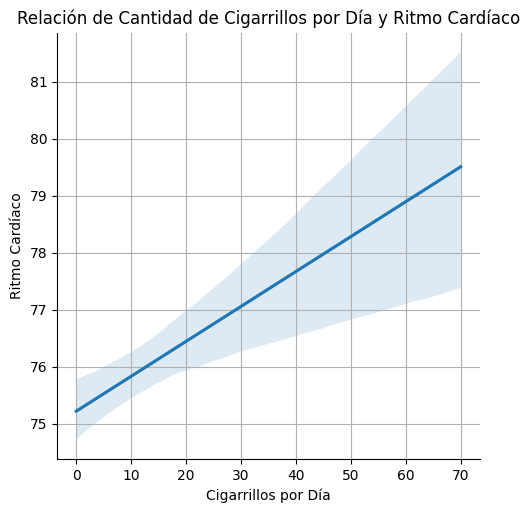

In [ ]:
import pandas as pd

# Convertir la columna 'cigarettes_per_day' a numérico, tratando errores
df_heart_disease_cleaned['cigarettes_per_day'] = pd.to_numeric(df_heart_disease_cleaned['cigarettes_per_day'], errors='coerce')

# Verificar los nuevos tipos de datos
print(df_heart_disease_cleaned['cigarettes_per_day'].dtype)

# Ahora puedes intentar crear el gráfico de nuevo, asegurándote que no hay valores NaN que puedan afectar la regresión
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de tendencia entre 'cigarettes_per_day' y 'heartRate'
sns.lmplot(x='cigarettes_per_day', y='heartRate', data=df_heart_disease_cleaned, scatter=False)

# Añadir título y etiquetas de ejes
plt.title('Relación de Cantidad de Cigarrillos por Día y Ritmo Cardíaco')
plt.xlabel('Cigarrillos por Día')
plt.ylabel('Ritmo Cardíaco')

# Agregar cuadrículas al gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()


2)	Distribución de las edades de las personas afectadas por enfermedades cardiovasculares

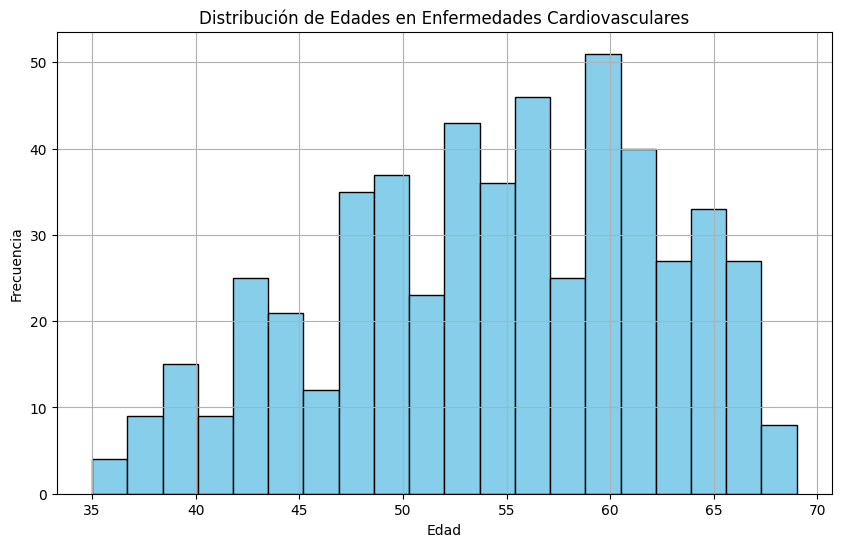

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar las filas
affected_df = df_heart_disease_cleaned[df_heart_disease_cleaned['heart_disease'].str.lower() == 'yes']

# Obtener la distribución de edades
age_distribution = affected_df['age']

# Crear un histograma para visualizar la distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(age_distribution, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades en Enfermedades Cardiovasculares')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

3)	Relación de los tipos de presiones arteriales y el Índice de Masa

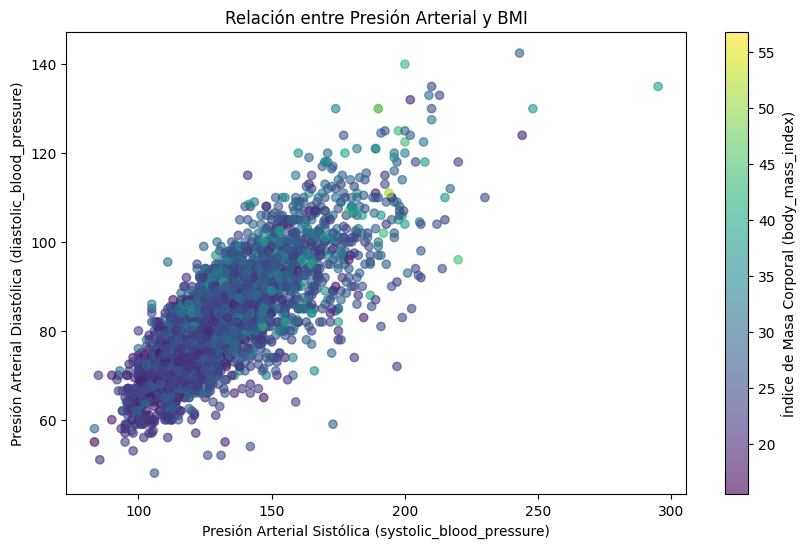

In [ ]:
# Eliminar filas con valores "na" en la columna 'BMI'
df_cleaned = df_heart_disease_cleaned[df_heart_disease_cleaned['body_mass_index'] != 'na']

# Convertir la columna 'BMI' a números (float)
df_cleaned['body_mass_index'] = df_cleaned['body_mass_index'].astype(float)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['systolic_blood_pressure'], df_cleaned['diastolic_blood_pressure'], c=df_cleaned['body_mass_index'], cmap='viridis', alpha=0.6)

# Añadir etiquetas y título
plt.xlabel('Presión Arterial Sistólica (systolic_blood_pressure)')
plt.ylabel('Presión Arterial Diastólica (diastolic_blood_pressure)')
plt.title('Relación entre Presión Arterial y BMI')

# Añadir barra de colores para el índice de masa corporal (BMI)
plt.colorbar(label='Índice de Masa Corporal (body_mass_index)')

# Mostrar el gráfico
plt.show()

4)	Relación entre Enfermedad Cardíaca y Ritmo Cardíaco

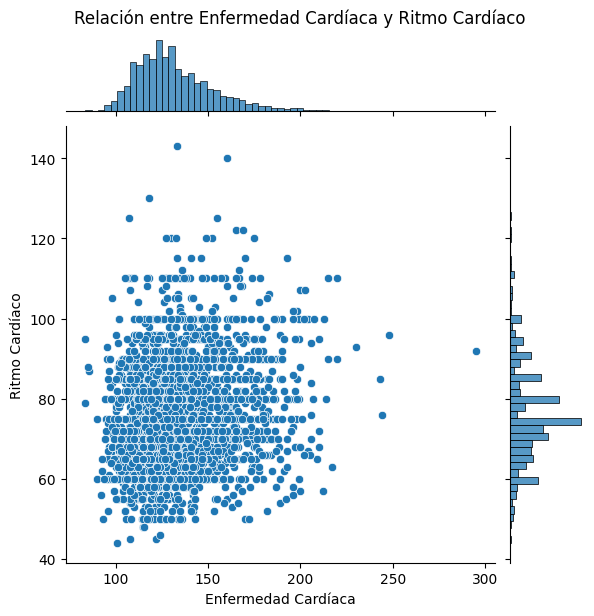

In [ ]:
# Crear un gráfico de dispersión con histogramas utilizando sns.jointplot
sns.jointplot(data=df_heart_disease_cleaned, x='systolic_blood_pressure', y='heartRate', kind='scatter', height=6)
plt.xlabel('Enfermedad Cardíaca')
plt.ylabel('Ritmo Cardíaco')
plt.suptitle('Relación entre Enfermedad Cardíaca y Ritmo Cardíaco', y=1.02)
plt.show()

MODELIZACIÓN RANDOM FOREST CON TODAS LAS VARIABLES


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df_heart_modelizacion = pd.read_pickle('/content/drive/My Drive/BPA/TP/df_transformationdata_transformacionheart.pickle')
df_heart_modelizacion

heart_disease_Yes   age  blood_pressure_medications  body_mass_index  \
0                     0 0.184                       0.000            0.277   
1                     0 0.421                       0.000            0.238   
2                     1 0.763                       0.000            0.316   
3                     0 0.368                       0.000            0.183   
4                     0 0.289                       0.000            0.358   
...                 ...   ...                         ...              ...   
3456                  0 0.684                       0.000            0.228   
3457                  1 0.947                       0.000            0.184   
3458                  1 0.474                       0.000            0.253   
3459                  0 0.500                       0.000            0.101   
3460                  0 0.526                       0.000            0.144   

      cigarettes_per_day  diabetes  diastolic_blood_pressure  glucose  \
0                  0.000     0.000                     0.233    0.105   
1                  0.286     0.000                     0.339    0.085   
2                  0.429     0.000                     0.497    0.178   
3                  0.329     0.000                     0.381    0.127   
4                  0.000     0.000                     0.656    0.167   
...                  ...       ...                       ...      ...   
3456               0.000     0.000                     0.349    0.116   
3457               0.000     0.000                     0.519    0.110   
3458               0.014     0.000                     0.466    0.130   
3459               0.614     0.000                     0.339    0.079   
3460               0.000     0.000                     0.370    0.189   

      heartRate  hypertension  is_current_smoker  systolic_blood_pressure  \
0         0.364         0.000              0.000                    0.106   
1         0.313         0.000              1.000                    0.208   
2         0.212         1.000              1.000                    0.314   
3         0.414         0.000              1.000                    0.220   
4         0.333         1.000              0.000                    0.456   
...         ...           ...                ...                      ...   
3456      0.364         1.000              0.000                    0.272   
3457      0.162         1.000              0.000                    0.400   
3458      0.222         1.000              1.000                    0.452   
3459      0.212         0.000              1.000                    0.203   
3460      0.364         0.000              0.000                    0.236   

      total_cholesterol  
0                 0.158  
1                 0.262  
2                 0.220  
3                 0.345  
4                 0.227  
...                 ...  
3456              0.141  
3457              0.119  
3458              0.403  
3459              0.183  
3460              0.312  

[3461 rows x 13 columns]

In [ ]:
df_heart_modelizacion.shape

(3461, 13)

In [ ]:
X = df_heart_modelizacion.drop(['heart_disease_Yes'], axis = 1)
y = df_heart_modelizacion['heart_disease_Yes']

In [ ]:
X

age  blood_pressure_medications  body_mass_index  cigarettes_per_day  \
0    0.184                       0.000            0.277               0.000   
1    0.421                       0.000            0.238               0.286   
2    0.763                       0.000            0.316               0.429   
3    0.368                       0.000            0.183               0.329   
4    0.289                       0.000            0.358               0.000   
...    ...                         ...              ...                 ...   
3456 0.684                       0.000            0.228               0.000   
3457 0.947                       0.000            0.184               0.000   
3458 0.474                       0.000            0.253               0.014   
3459 0.500                       0.000            0.101               0.614   
3460 0.526                       0.000            0.144               0.000   

      diabetes  diastolic_blood_pressure  glucose  heartRate  hypertension  \
0        0.000                     0.233    0.105      0.364         0.000   
1        0.000                     0.339    0.085      0.313         0.000   
2        0.000                     0.497    0.178      0.212         1.000   
3        0.000                     0.381    0.127      0.414         0.000   
4        0.000                     0.656    0.167      0.333         1.000   
...        ...                       ...      ...        ...           ...   
3456     0.000                     0.349    0.116      0.364         1.000   
3457     0.000                     0.519    0.110      0.162         1.000   
3458     0.000                     0.466    0.130      0.222         1.000   
3459     0.000                     0.339    0.079      0.212         0.000   
3460     0.000                     0.370    0.189      0.364         0.000   

      is_current_smoker  systolic_blood_pressure  total_cholesterol  
0                 0.000                    0.106              0.158  
1                 1.000                    0.208              0.262  
2                 1.000                    0.314              0.220  
3                 1.000                    0.220              0.345  
4                 0.000                    0.456              0.227  
...                 ...                      ...                ...  
3456              0.000                    0.272              0.141  
3457              0.000                    0.400              0.119  
3458              1.000                    0.452              0.403  
3459              1.000                    0.203              0.183  
3460              0.000                    0.236              0.312  

[3461 rows x 12 columns]

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
3456    0
3457    1
3458    1
3459    0
3460    0
Name: heart_disease_Yes, Length: 3461, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2768, 12)
(693, 12)
(2768,)
(693,)


In [ ]:
#Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Instanciamos el modelo
modelo_RandomForest = RandomForestClassifier()

In [ ]:
#Entrenamos el modelo
modelo_RandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predecimos usando los datos de test
y_pred_RandomForest       = modelo_RandomForest.predict(X_test)
y_pred_RandomForest_proba = modelo_RandomForest.predict_proba(X_test)
#y_pred_RandomForest_proba[:,1][:10]

In [ ]:
#Importamos las métricas
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [ ]:
confusion_matrix_RandomForest = confusion_matrix(y_test,y_pred_RandomForest)

In [ ]:
#Mostrar el confusion matrix como dataframe
pd.DataFrame(confusion_matrix_RandomForest,columns = ['Prediccion NO','Prediccion SI'], index = ['Real NO','Real SI'])

Prediccion NO  Prediccion SI
Real NO            591              5
Real SI             92              5

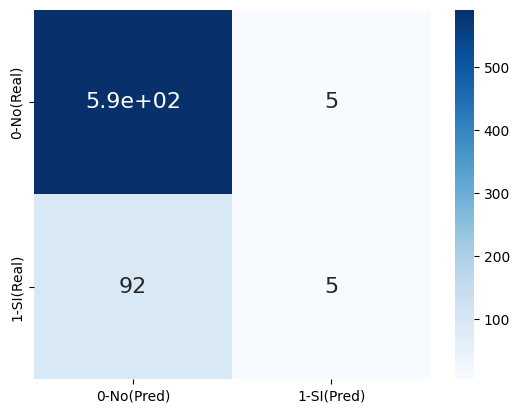

In [ ]:
#Mostrar el confusion matrix como grafico
sns.heatmap(confusion_matrix_RandomForest, annot=True,xticklabels=['0-No(Pred)','1-SI(Pred)'],
            yticklabels=['0-No(Real)','1-SI(Real)'], cmap = 'Blues',annot_kws={"size": 16});

In [ ]:
acc_RandomForest  = accuracy_score(y_test,y_pred_RandomForest)
f1_RandomForest   = f1_score(y_test,y_pred_RandomForest)
prec_RandomForest = precision_score(y_test, y_pred_RandomForest)
rec_RandomForest  = recall_score(y_test, y_pred_RandomForest)
auc_RandomForest  = roc_auc_score(y_test,y_pred_RandomForest_proba[:,1])

In [ ]:
results = pd.DataFrame([['Random Forest', acc_RandomForest,f1_RandomForest,prec_RandomForest,rec_RandomForest,auc_RandomForest]],
                       columns = ['Model','Accuracy','F1','Precision','Recall','AUC'])

In [ ]:
results

Model  Accuracy    F1  Precision  Recall   AUC
0  Random Forest     0.860 0.093      0.500   0.052 0.719

In [ ]:
#Número de arboles generados
modelo_RandomForest.n_estimators

100

In [ ]:
#Numero de variables usadas
modelo_RandomForest.n_features_in_

12

In [ ]:
#Arbol en indice 5
estimator = modelo_RandomForest.estimators_[5]

In [ ]:
from sklearn import tree

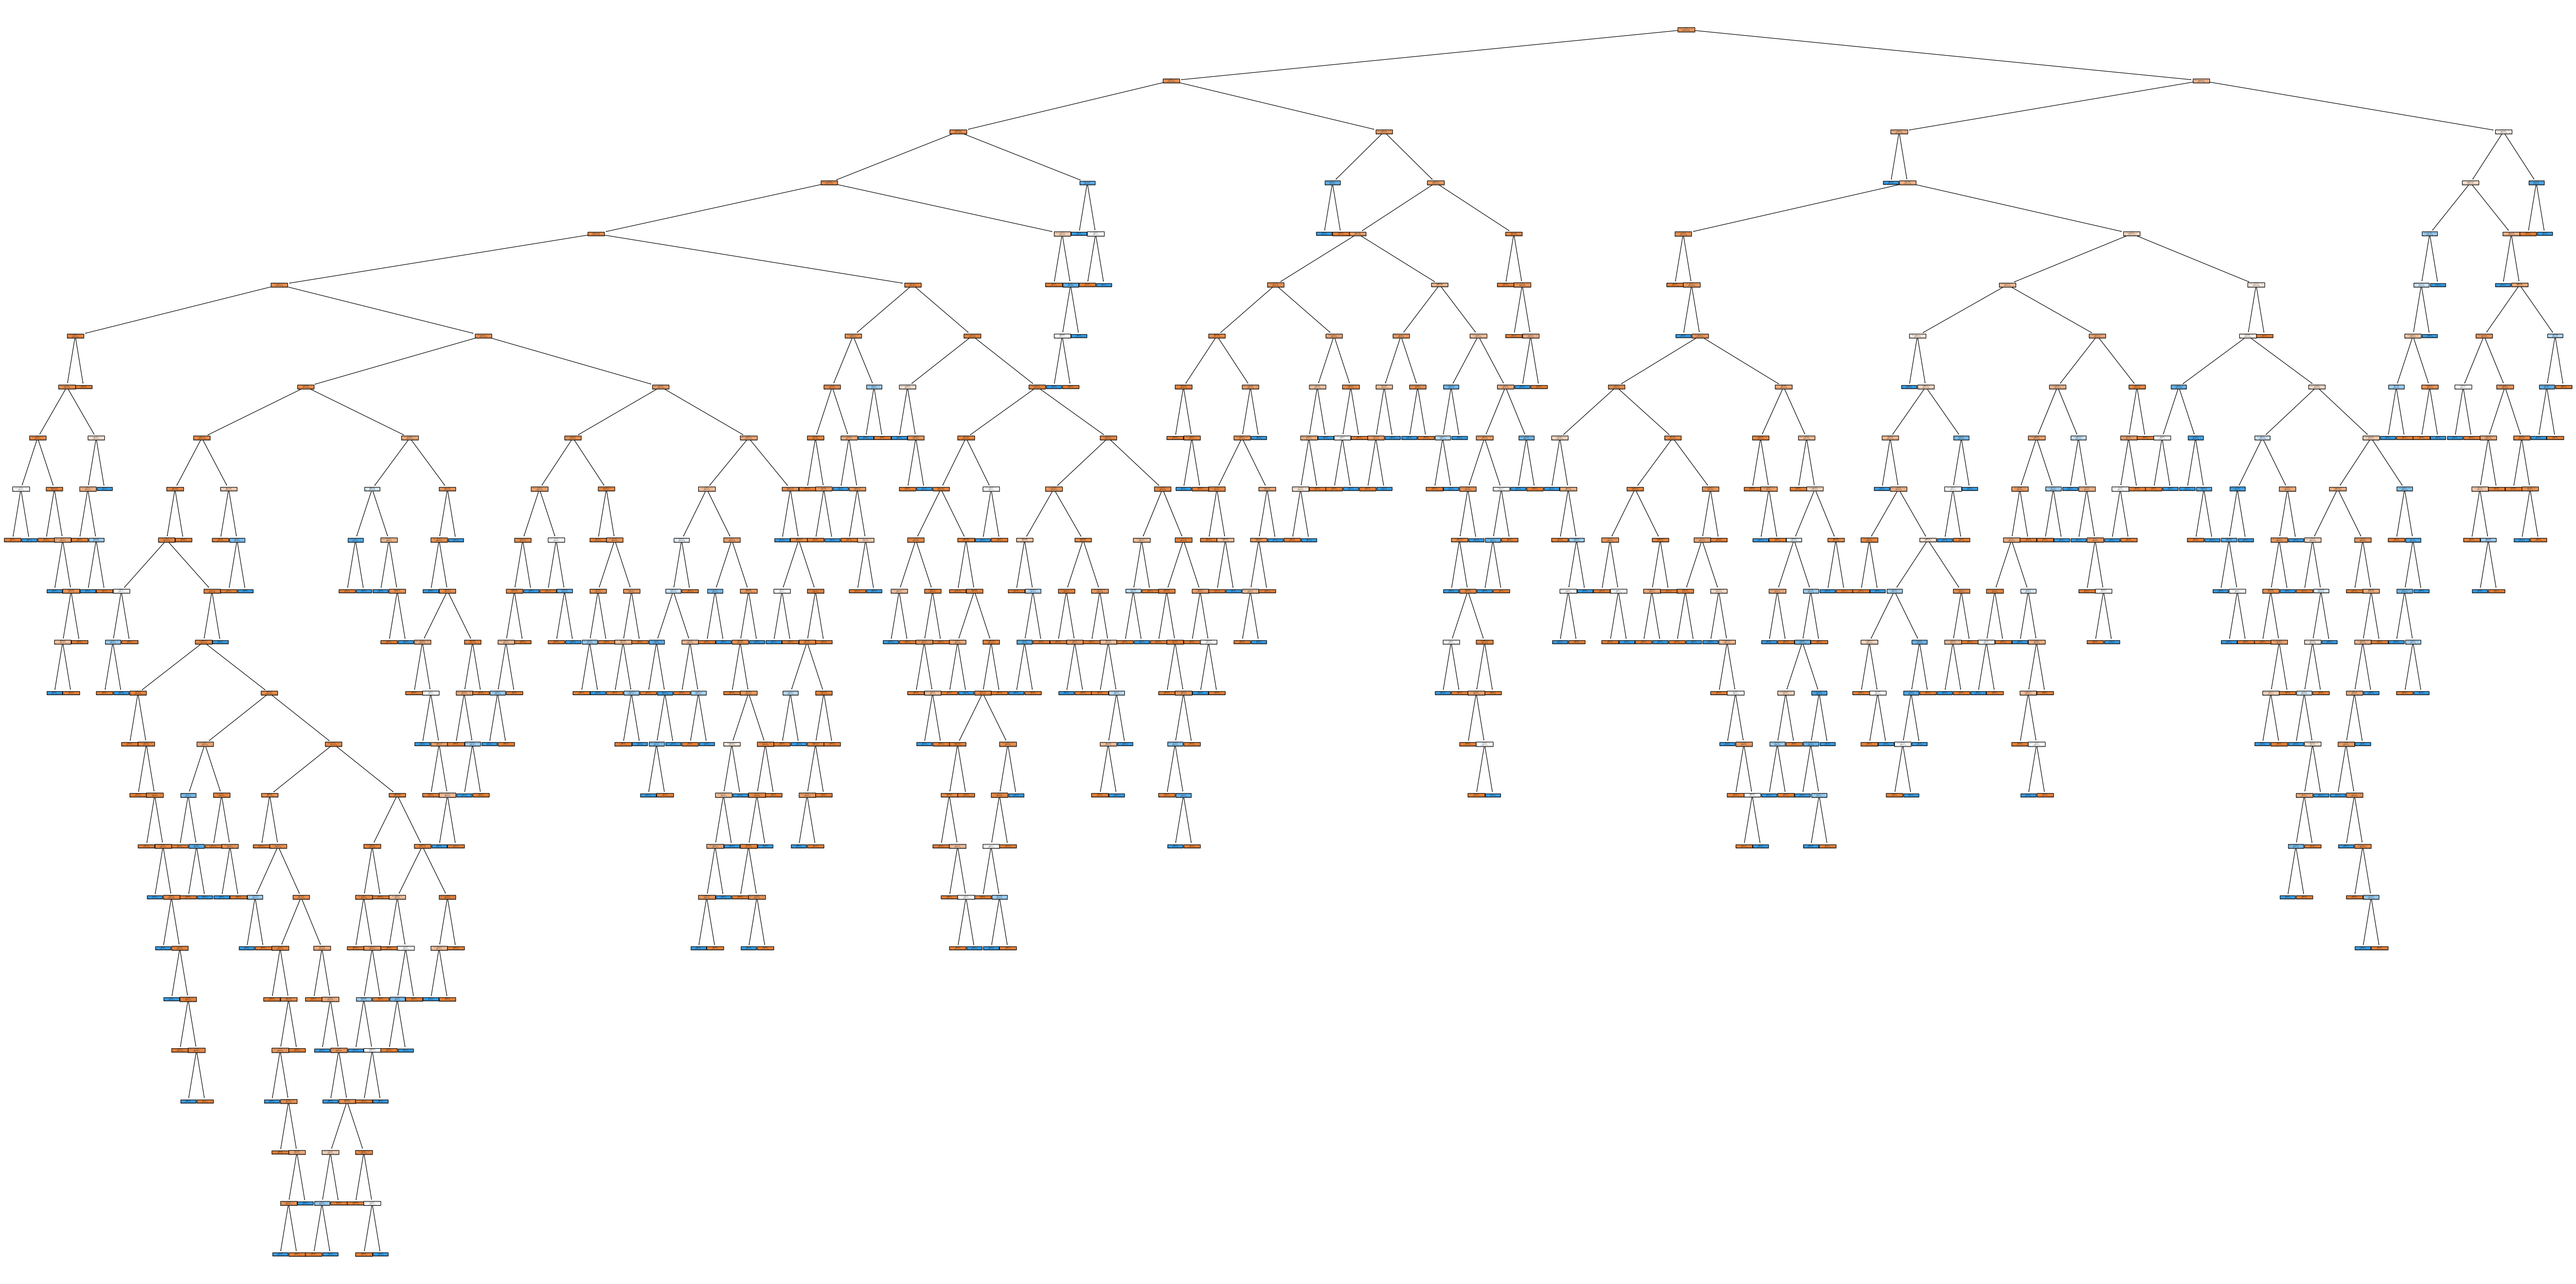

In [ ]:
# Limitar la profundidad del árbol para facilitar la visualización
estimator.set_params(max_depth=3)  # Ajusta la profundidad según sea necesario

fig = plt.figure(figsize=(80,40))  # Tamaño grande para alta resolución
_ = tree.plot_tree(estimator,
                   feature_names=X.columns,
                   class_names=['No tiene enfermedad cardiaca', 'Tiene enfermedad cardiaca'],
                   node_ids=True,
                   filled=True)
fig.savefig("decision_tree_high_res.png", dpi=300)  # Guardar con alta resolución
plt.show()

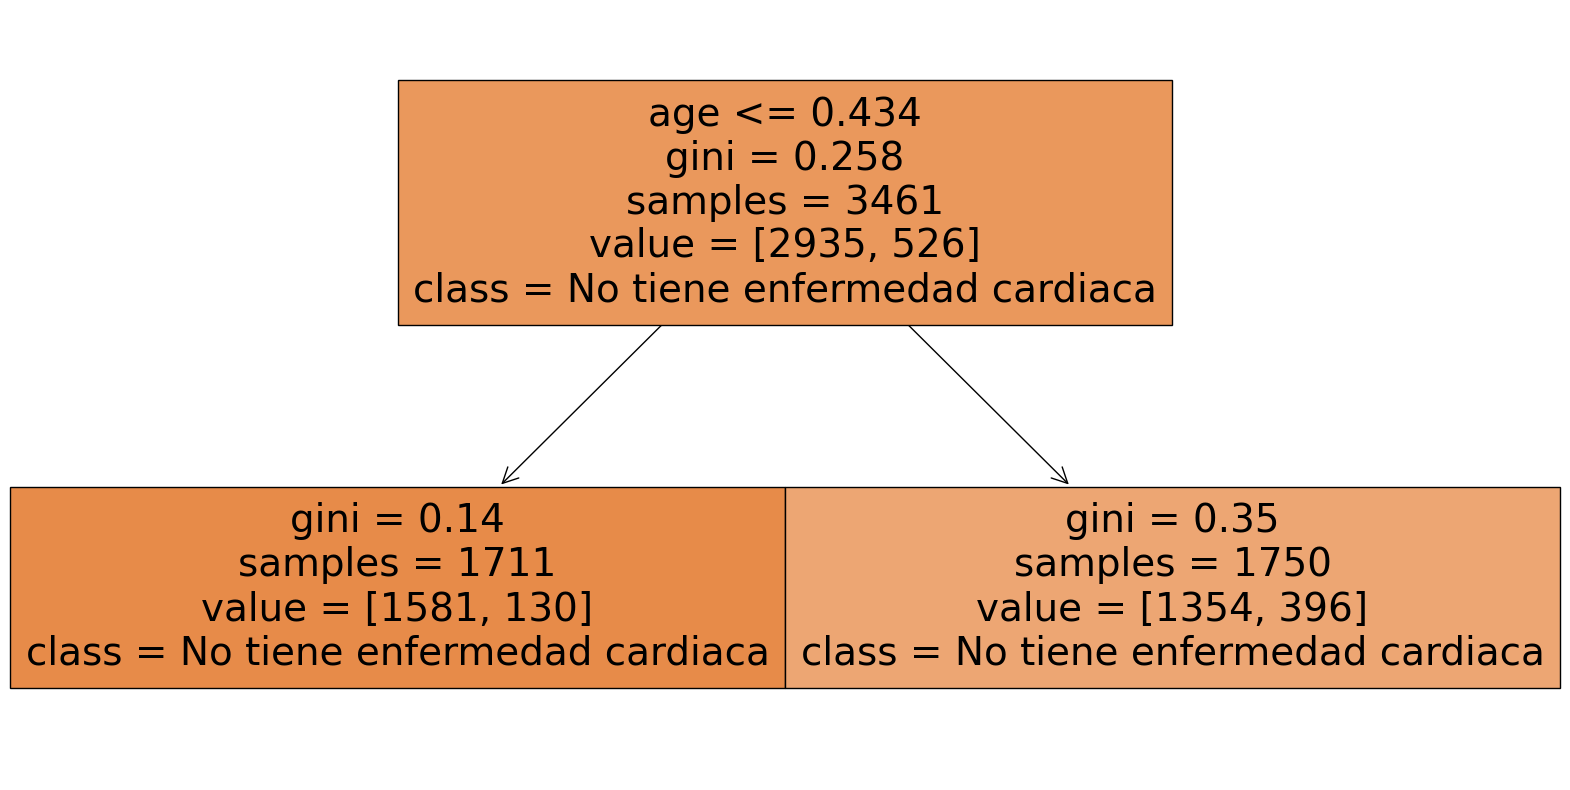

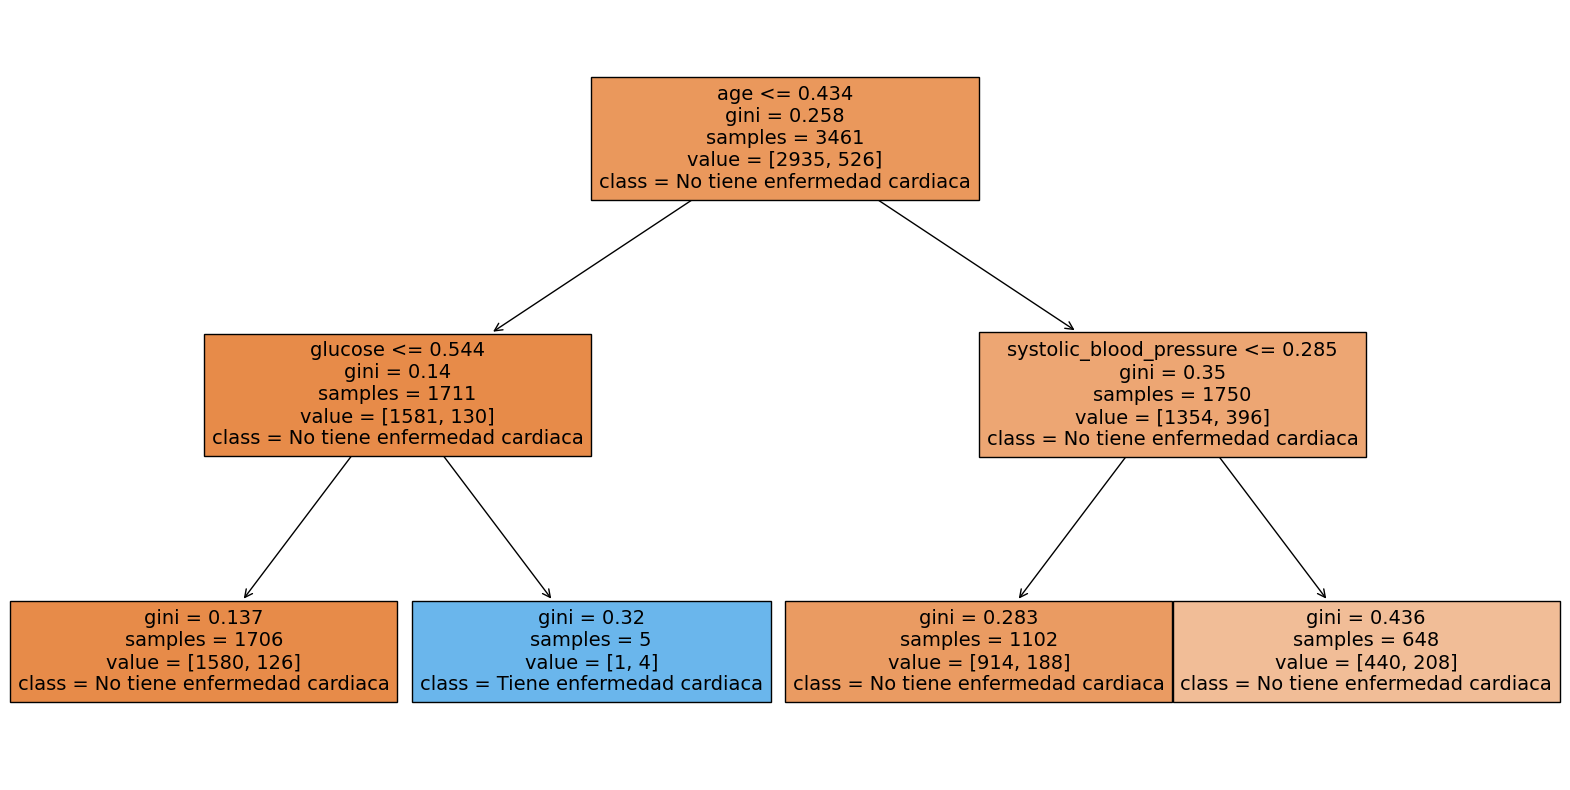

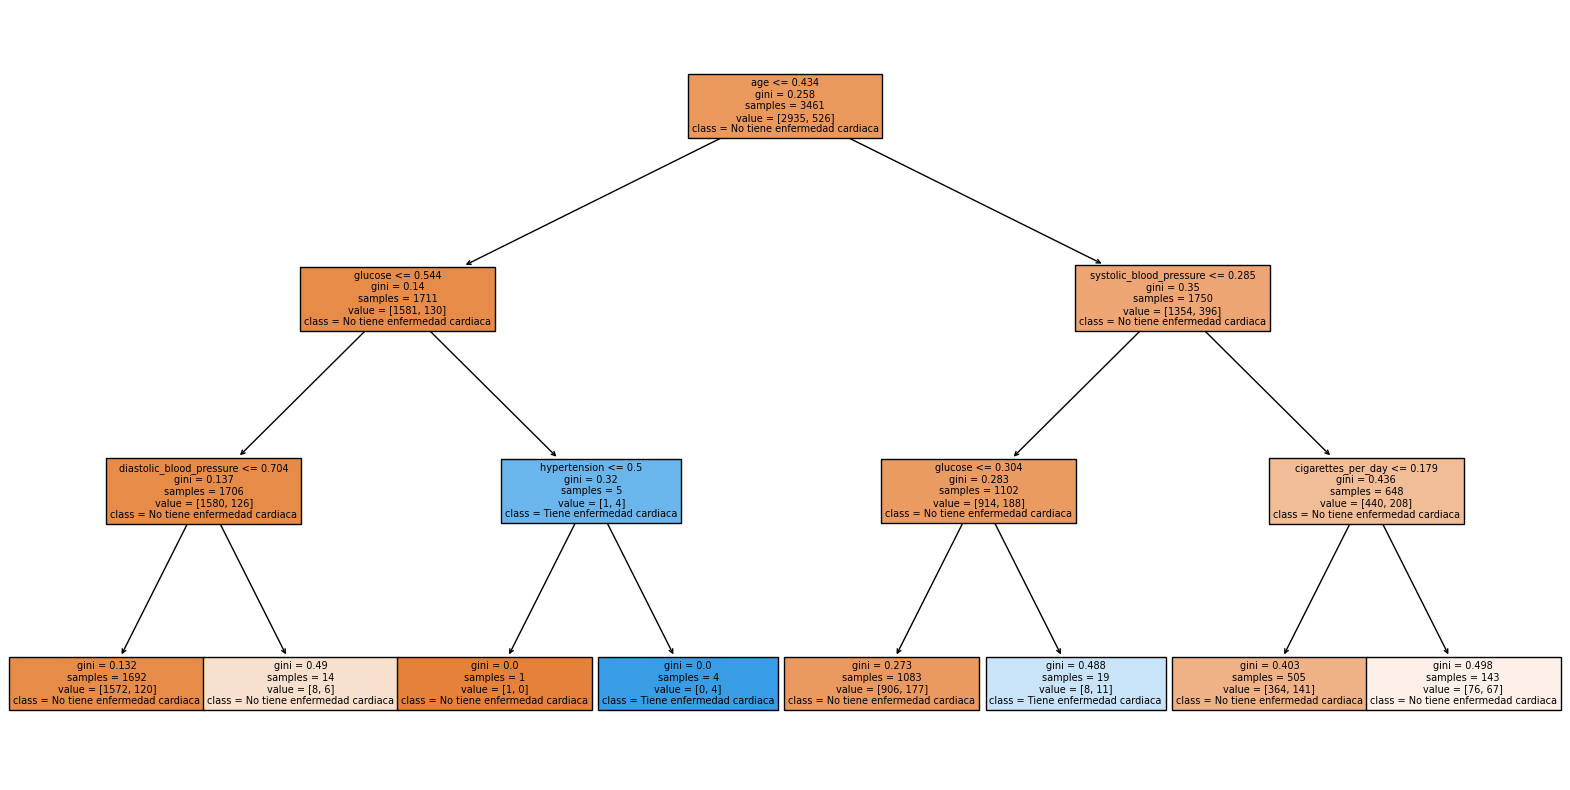

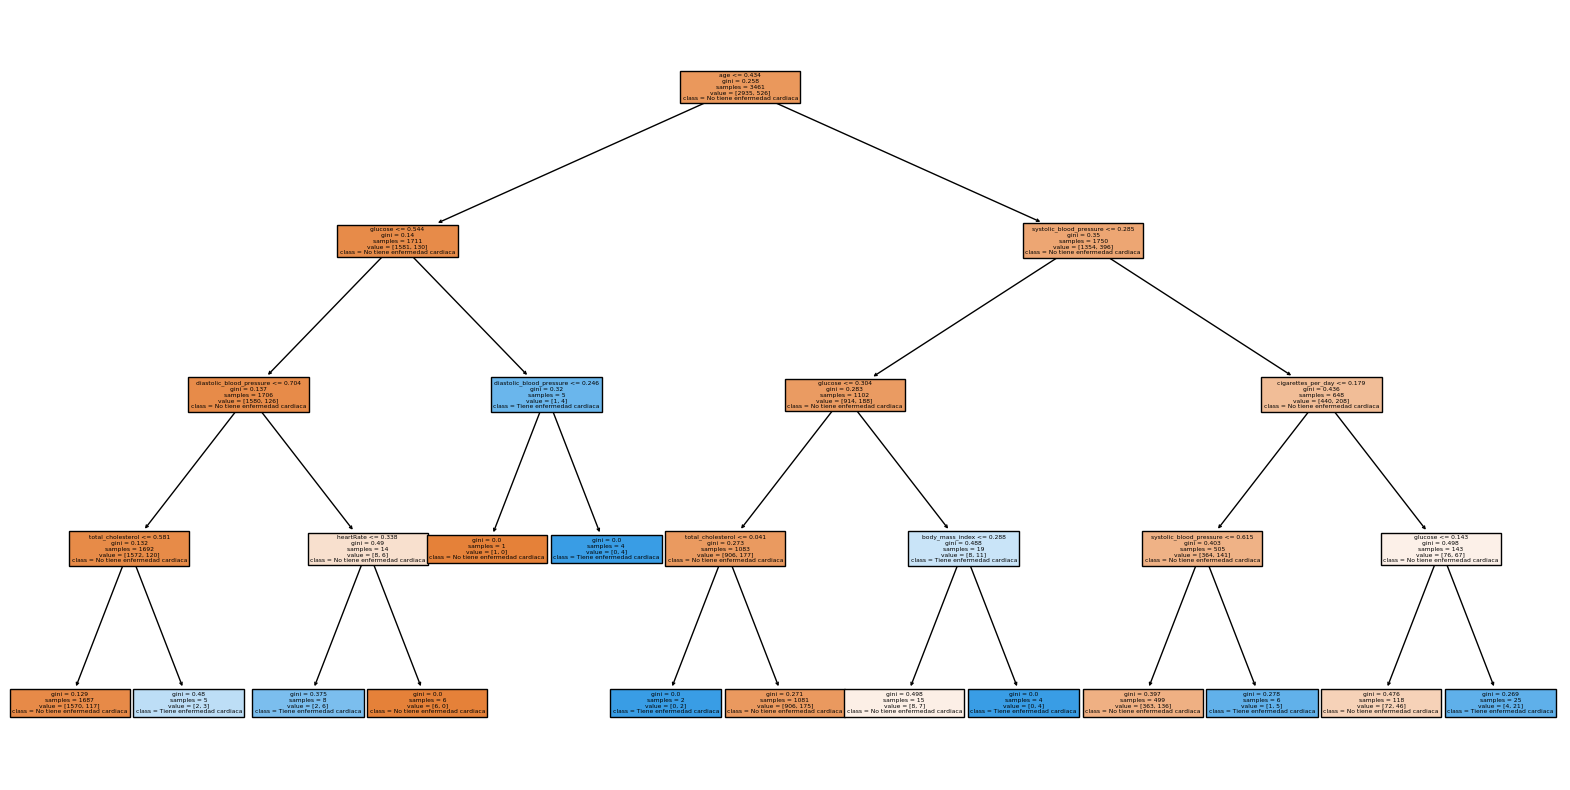

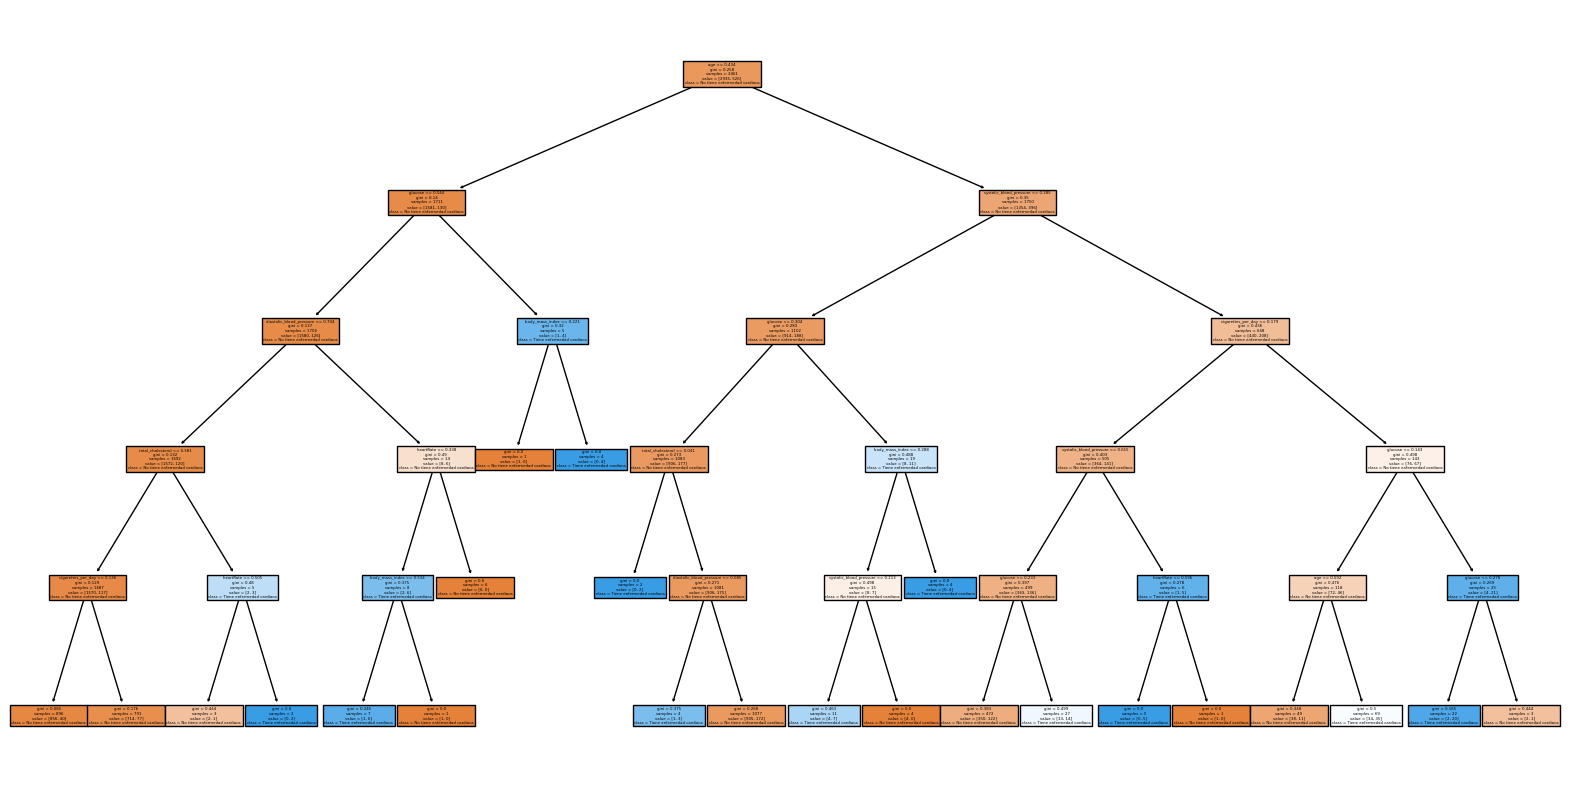

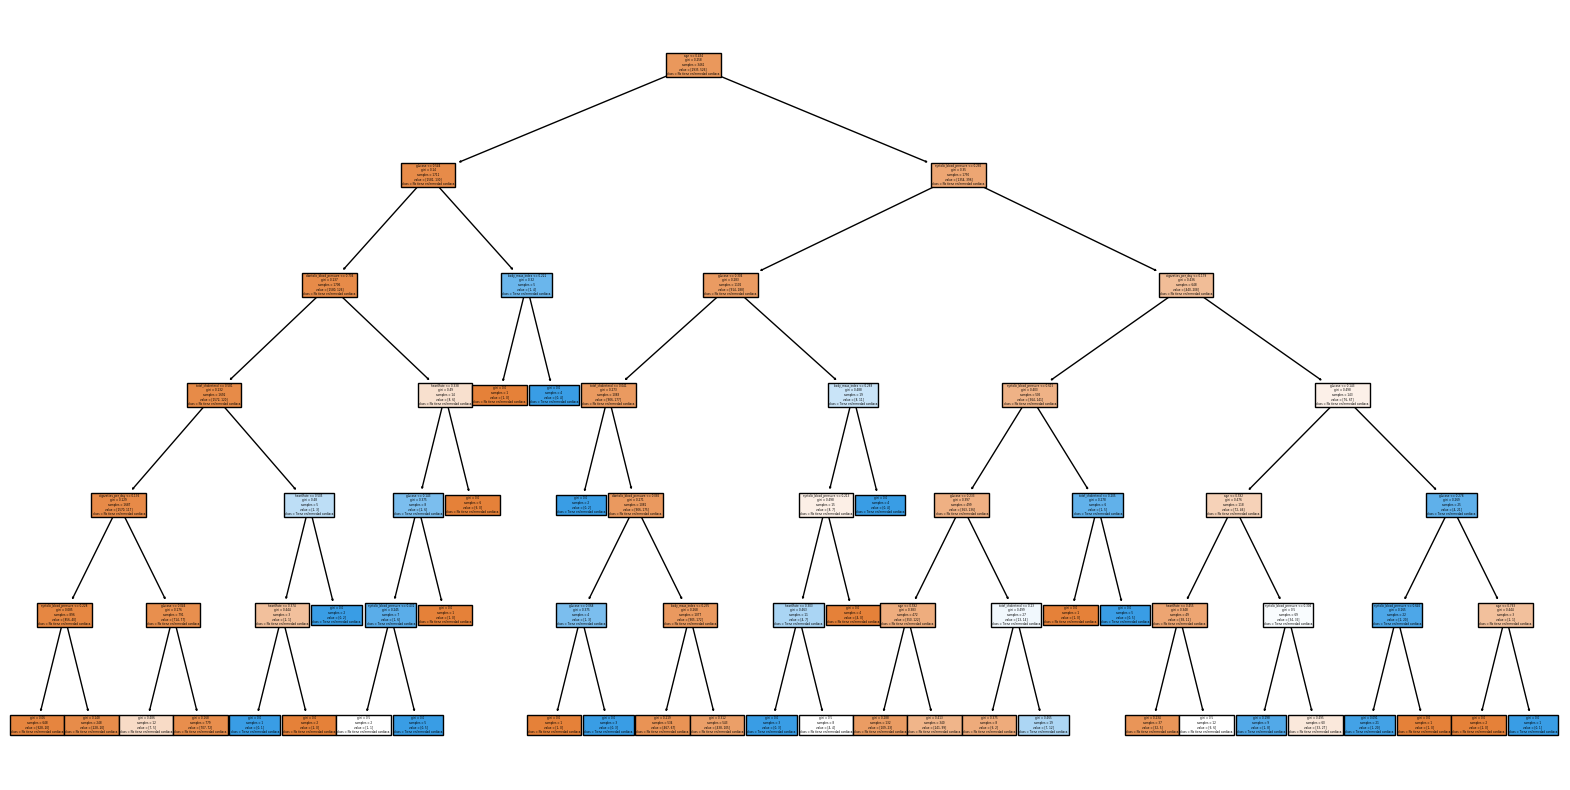

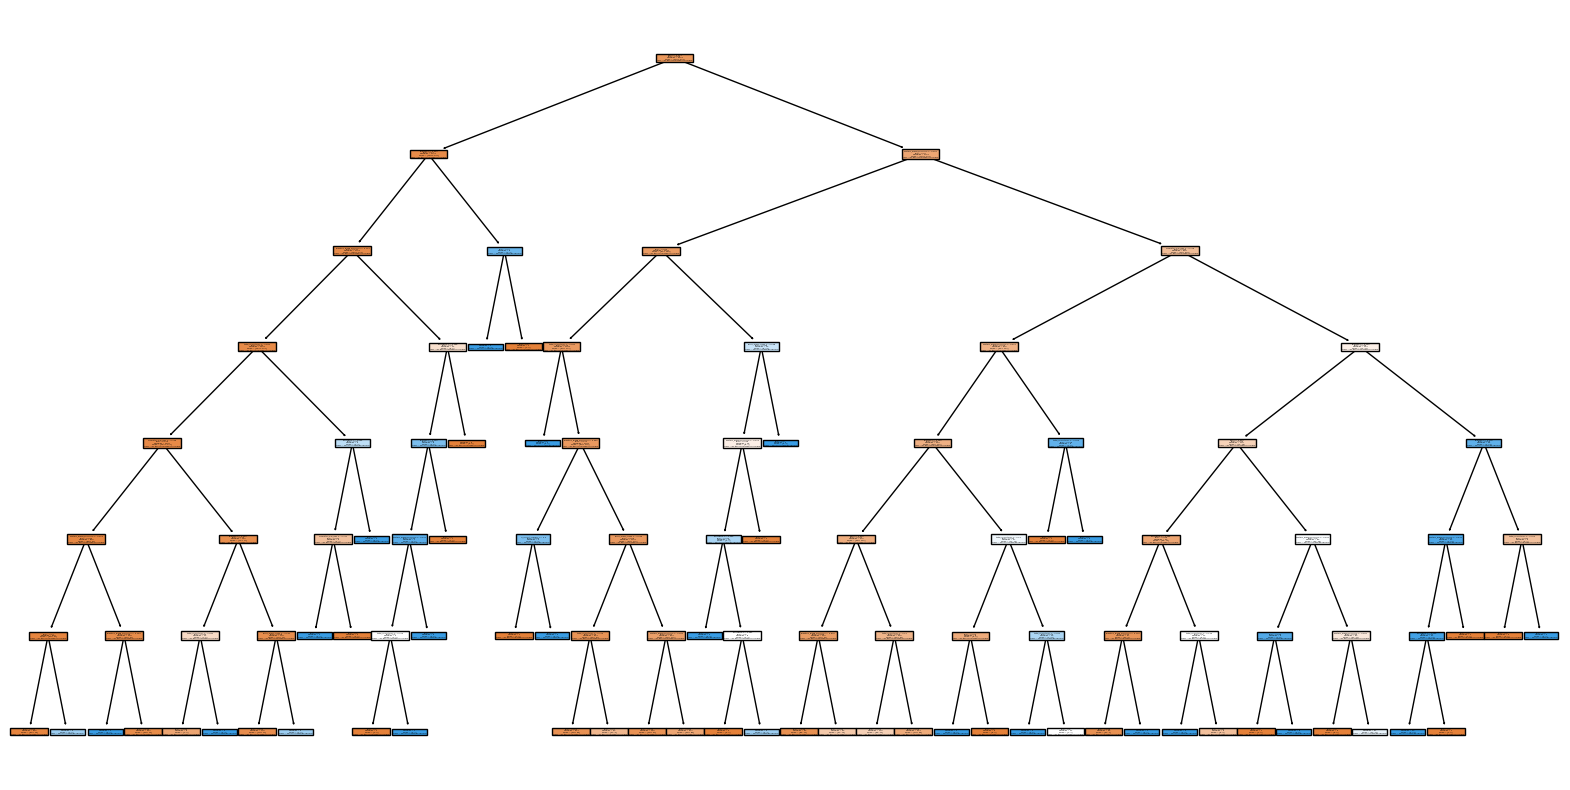

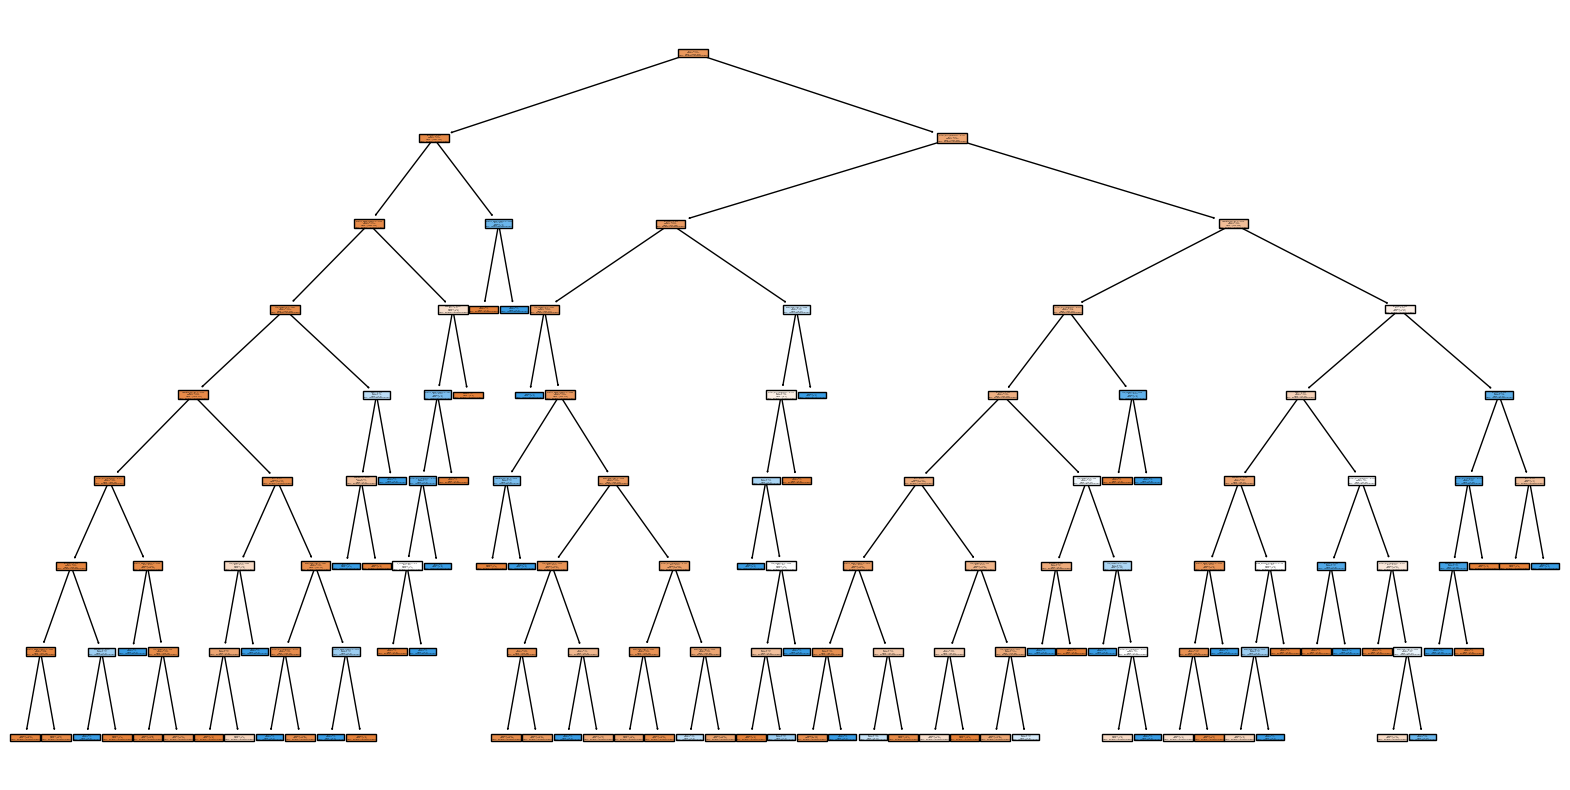

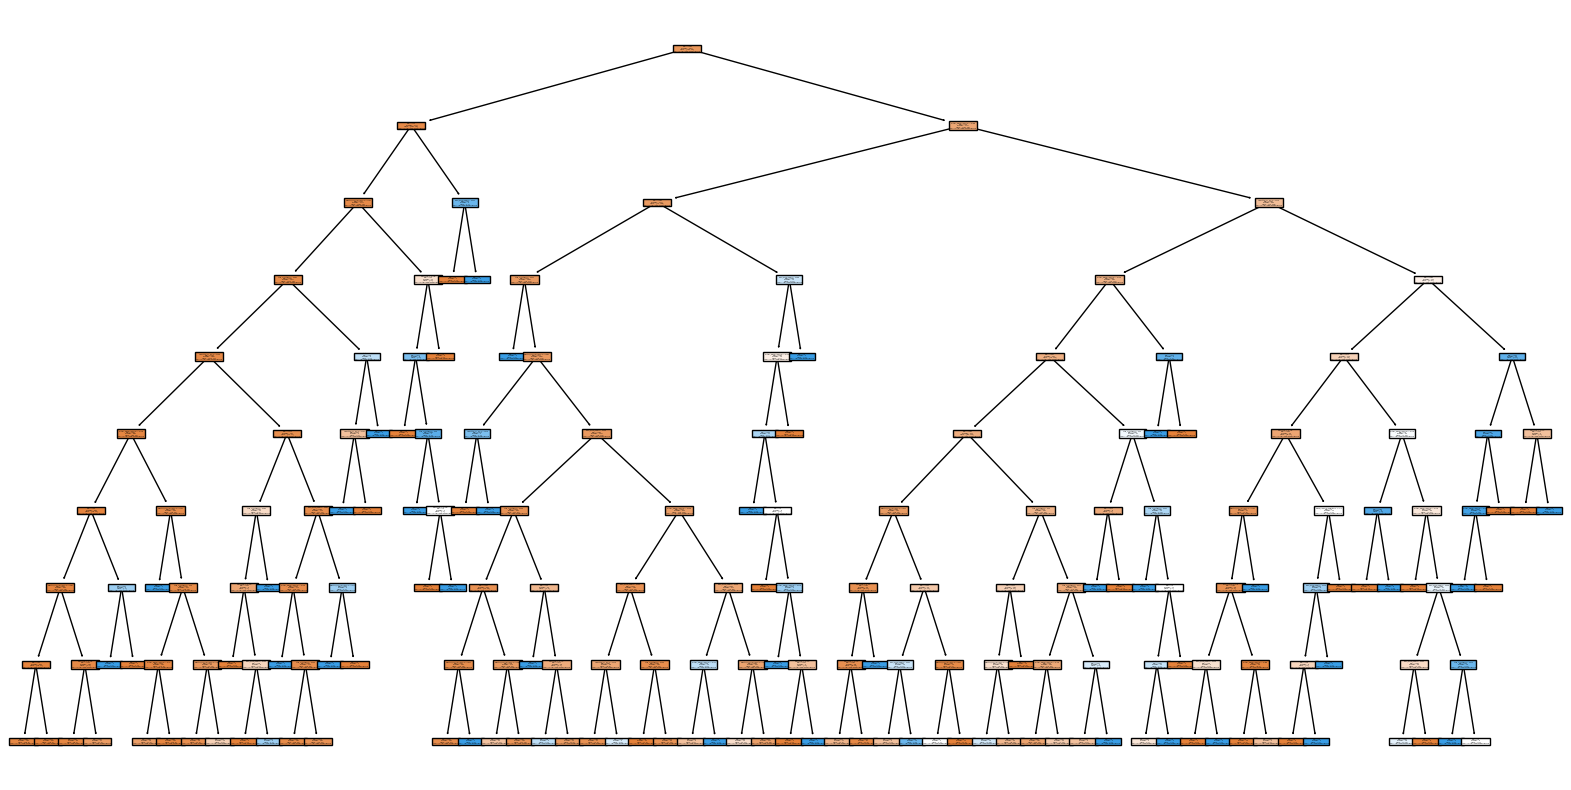

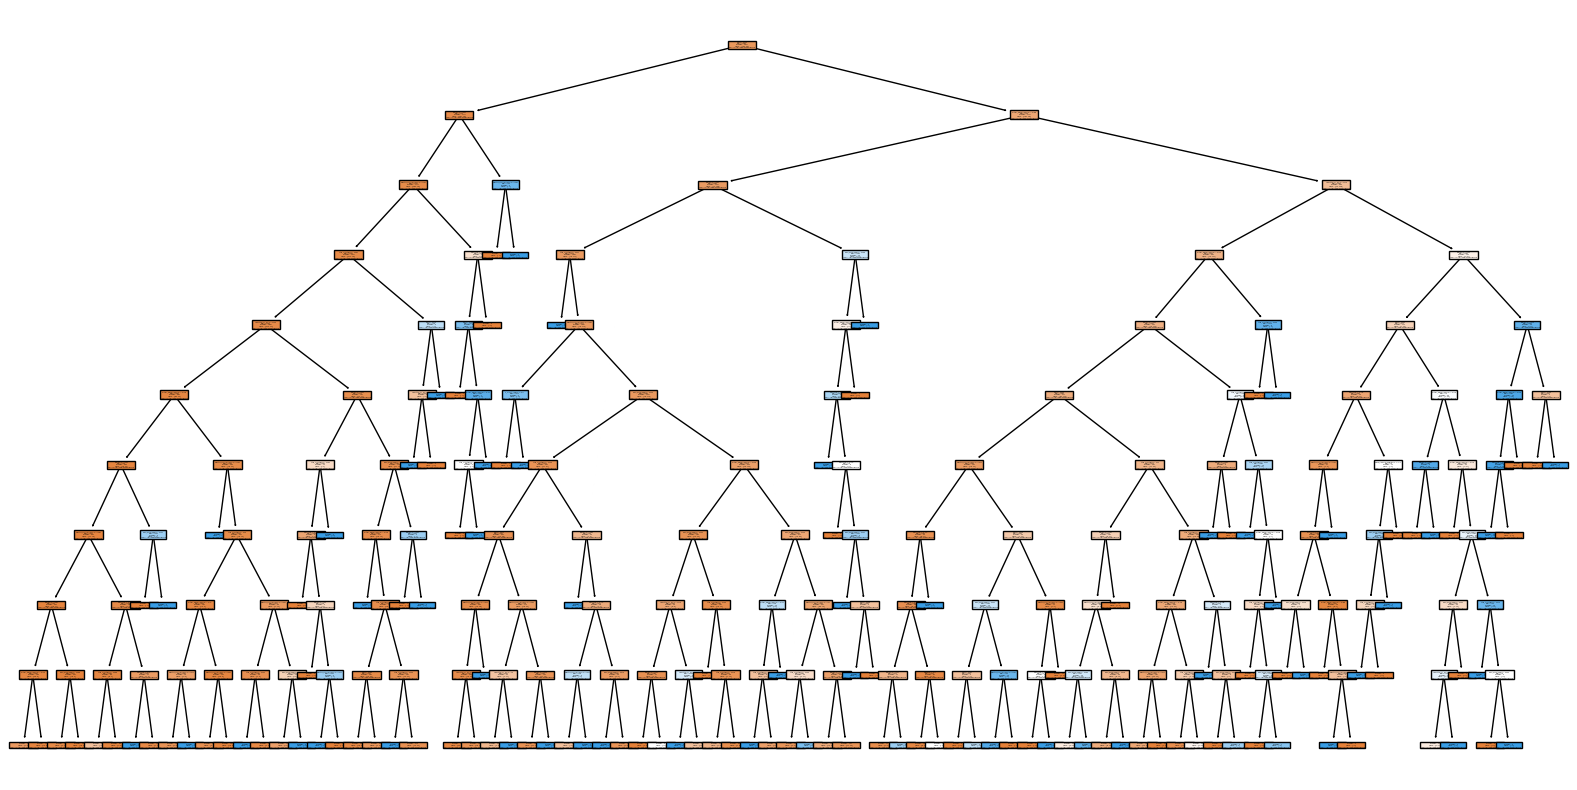

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Función para graficar un subárbol
def plot_subtree(estimator, max_depth, feature_names, class_names, filename):
    sub_estimator = tree.DecisionTreeClassifier(max_depth=max_depth)
    sub_estimator.fit(X, y)
    fig = plt.figure(figsize=(20,10))
    _ = tree.plot_tree(sub_estimator,
                       feature_names=feature_names,
                       class_names=class_names,
                       filled=True)
    fig.savefig(filename)
    plt.show()

# Graficar árboles de diferentes profundidades
for depth in range(1, 11):  # Ajusta el rango según sea necesario
    plot_subtree(estimator, depth, X.columns, ['No tiene enfermedad cardiaca', 'Tiene enfermedad cardiaca'], f"decision_tree_depth_{depth}.png")

In [ ]:
df_heart_modelizacion.to_pickle('/content/drive/My Drive/BPA/TP/df_heart_modelizacion_nuevo_variables_actualizadas.pickle')

MODELIZACIÓN RANDOM FOREST CON FEATURE SELECTION - TÉCNICA DE RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df_heart_modelizacion = pd.read_pickle('/content/drive/My Drive/BPA/TP/df_transformationdata_transformacionheart.pickle')
df_heart_modelizacion

heart_disease_Yes   age  blood_pressure_medications  body_mass_index  \
0                     0 0.184                       0.000            0.277   
1                     0 0.421                       0.000            0.238   
2                     1 0.763                       0.000            0.316   
3                     0 0.368                       0.000            0.183   
4                     0 0.289                       0.000            0.358   
...                 ...   ...                         ...              ...   
3456                  0 0.684                       0.000            0.228   
3457                  1 0.947                       0.000            0.184   
3458                  1 0.474                       0.000            0.253   
3459                  0 0.500                       0.000            0.101   
3460                  0 0.526                       0.000            0.144   

      cigarettes_per_day  diabetes  diastolic_blood_pressure  glucose  \
0                  0.000     0.000                     0.233    0.105   
1                  0.286     0.000                     0.339    0.085   
2                  0.429     0.000                     0.497    0.178   
3                  0.329     0.000                     0.381    0.127   
4                  0.000     0.000                     0.656    0.167   
...                  ...       ...                       ...      ...   
3456               0.000     0.000                     0.349    0.116   
3457               0.000     0.000                     0.519    0.110   
3458               0.014     0.000                     0.466    0.130   
3459               0.614     0.000                     0.339    0.079   
3460               0.000     0.000                     0.370    0.189   

      heartRate  hypertension  is_current_smoker  systolic_blood_pressure  \
0         0.364         0.000              0.000                    0.106   
1         0.313         0.000              1.000                    0.208   
2         0.212         1.000              1.000                    0.314   
3         0.414         0.000              1.000                    0.220   
4         0.333         1.000              0.000                    0.456   
...         ...           ...                ...                      ...   
3456      0.364         1.000              0.000                    0.272   
3457      0.162         1.000              0.000                    0.400   
3458      0.222         1.000              1.000                    0.452   
3459      0.212         0.000              1.000                    0.203   
3460      0.364         0.000              0.000                    0.236   

      total_cholesterol  
0                 0.158  
1                 0.262  
2                 0.220  
3                 0.345  
4                 0.227  
...                 ...  
3456              0.141  
3457              0.119  
3458              0.403  
3459              0.183  
3460              0.312  

[3461 rows x 13 columns]

In [ ]:
columns_to_drop = ['blood_pressure_medications', 'cigarettes_per_day', 'diabetes', 'hypertension', 'is_current_smoker']
df_heart_modelizacion_nuevo = df_heart_modelizacion.drop(columns=columns_to_drop)

In [ ]:
df_heart_modelizacion_nuevo.head()

heart_disease_Yes   age  body_mass_index  diastolic_blood_pressure  \
0                  0 0.184            0.277                     0.233   
1                  0 0.421            0.238                     0.339   
2                  1 0.763            0.316                     0.497   
3                  0 0.368            0.183                     0.381   
4                  0 0.289            0.358                     0.656   

   glucose  heartRate  systolic_blood_pressure  total_cholesterol  
0    0.105      0.364                    0.106              0.158  
1    0.085      0.313                    0.208              0.262  
2    0.178      0.212                    0.314              0.220  
3    0.127      0.414                    0.220              0.345  
4    0.167      0.333                    0.456              0.227

In [ ]:
df_heart_modelizacion_nuevo.shape

(3461, 8)

In [ ]:
X = df_heart_modelizacion_nuevo.drop(['heart_disease_Yes'], axis = 1)
y = df_heart_modelizacion_nuevo['heart_disease_Yes']

In [ ]:
X

age  body_mass_index  diastolic_blood_pressure  glucose  heartRate  \
0    0.184            0.277                     0.233    0.105      0.364   
1    0.421            0.238                     0.339    0.085      0.313   
2    0.763            0.316                     0.497    0.178      0.212   
3    0.368            0.183                     0.381    0.127      0.414   
4    0.289            0.358                     0.656    0.167      0.333   
...    ...              ...                       ...      ...        ...   
3456 0.684            0.228                     0.349    0.116      0.364   
3457 0.947            0.184                     0.519    0.110      0.162   
3458 0.474            0.253                     0.466    0.130      0.222   
3459 0.500            0.101                     0.339    0.079      0.212   
3460 0.526            0.144                     0.370    0.189      0.364   

      systolic_blood_pressure  total_cholesterol  
0                       0.106              0.158  
1                       0.208              0.262  
2                       0.314              0.220  
3                       0.220              0.345  
4                       0.456              0.227  
...                       ...                ...  
3456                    0.272              0.141  
3457                    0.400              0.119  
3458                    0.452              0.403  
3459                    0.203              0.183  
3460                    0.236              0.312  

[3461 rows x 7 columns]

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
3456    0
3457    1
3458    1
3459    0
3460    0
Name: heart_disease_Yes, Length: 3461, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2768, 7)
(693, 7)
(2768,)
(693,)


In [ ]:
#Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Instanciamos el modelo
modelo_RandomForest = RandomForestClassifier()

In [ ]:
#Entrenamos el modelo
modelo_RandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predecimos usando los datos de test
y_pred_RandomForest       = modelo_RandomForest.predict(X_test)
y_pred_RandomForest_proba = modelo_RandomForest.predict_proba(X_test)
#y_pred_RandomForest_proba[:,1][:10]

In [ ]:
#Importamos las métricas
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [ ]:
confusion_matrix_RandomForest = confusion_matrix(y_test,y_pred_RandomForest)

In [ ]:
#Mostrar el confusion matrix como dataframe
pd.DataFrame(confusion_matrix_RandomForest,columns = ['Prediccion NO','Prediccion SI'], index = ['Real NO','Real SI'])

Prediccion NO  Prediccion SI
Real NO            591              5
Real SI             91              6

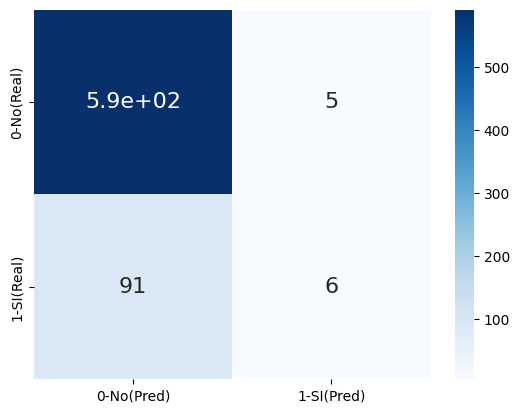

In [ ]:
#Mostrar el confusion matrix como grafico
sns.heatmap(confusion_matrix_RandomForest, annot=True,xticklabels=['0-No(Pred)','1-SI(Pred)'],
            yticklabels=['0-No(Real)','1-SI(Real)'], cmap = 'Blues',annot_kws={"size": 16});

In [ ]:
acc_RandomForest  = accuracy_score(y_test,y_pred_RandomForest)
f1_RandomForest   = f1_score(y_test,y_pred_RandomForest)
prec_RandomForest = precision_score(y_test, y_pred_RandomForest)
rec_RandomForest  = recall_score(y_test, y_pred_RandomForest)
auc_RandomForest  = roc_auc_score(y_test,y_pred_RandomForest_proba[:,1])

In [ ]:
results = pd.DataFrame([['Random Forest', acc_RandomForest,f1_RandomForest,prec_RandomForest,rec_RandomForest,auc_RandomForest]],
                       columns = ['Model','Accuracy','F1','Precision','Recall','AUC'])

In [ ]:
results

Model  Accuracy    F1  Precision  Recall   AUC
0  Random Forest     0.861 0.111      0.545   0.062 0.707

In [ ]:
#Número de arboles generados
modelo_RandomForest.n_estimators

100

In [ ]:
#Numero de variables usadas
modelo_RandomForest.n_features_in_

7

In [ ]:
#Arbol en indice 5
estimator = modelo_RandomForest.estimators_[5]

In [ ]:
from sklearn import tree

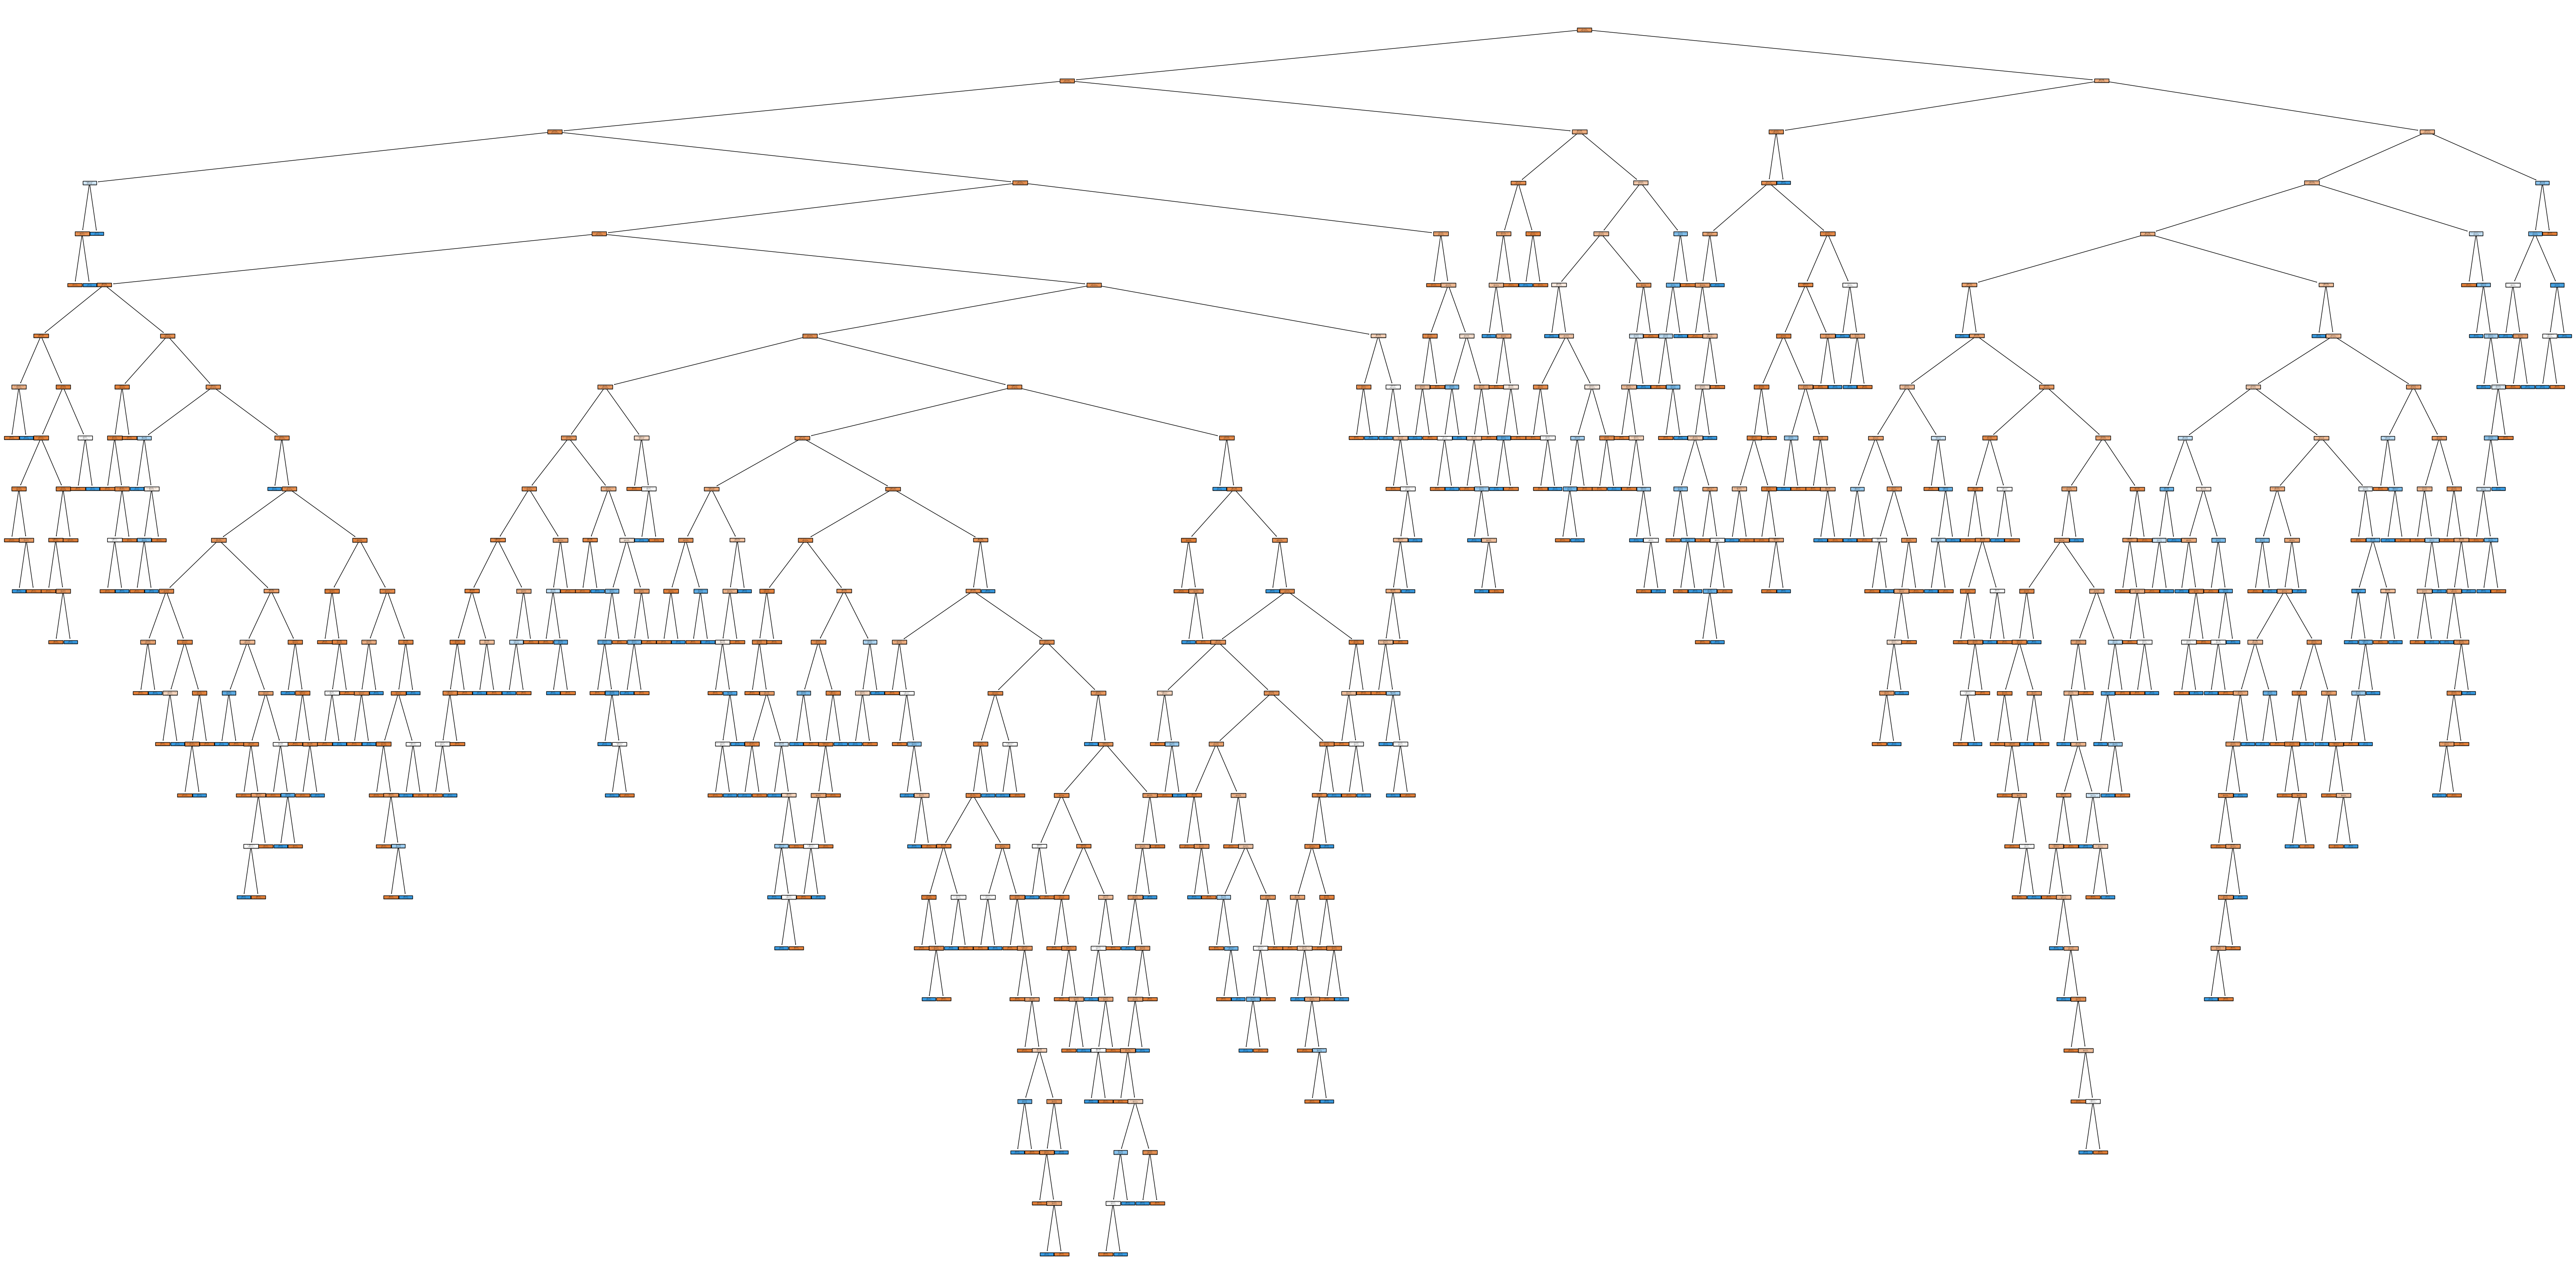

In [ ]:
# Limitar la profundidad del árbol para facilitar la visualización
estimator.set_params(max_depth=3)  # Ajusta la profundidad según sea necesario

fig = plt.figure(figsize=(80,40))  # Tamaño grande para alta resolución
_ = tree.plot_tree(estimator,
                   feature_names=X.columns,
                   class_names=['No tiene enfermedad cardiaca', 'Tiene enfermedad cardiaca'],
                   node_ids=True,
                   filled=True)
fig.savefig("decision_tree_high_res.png", dpi=300)  # Guardar con alta resolución
plt.show()

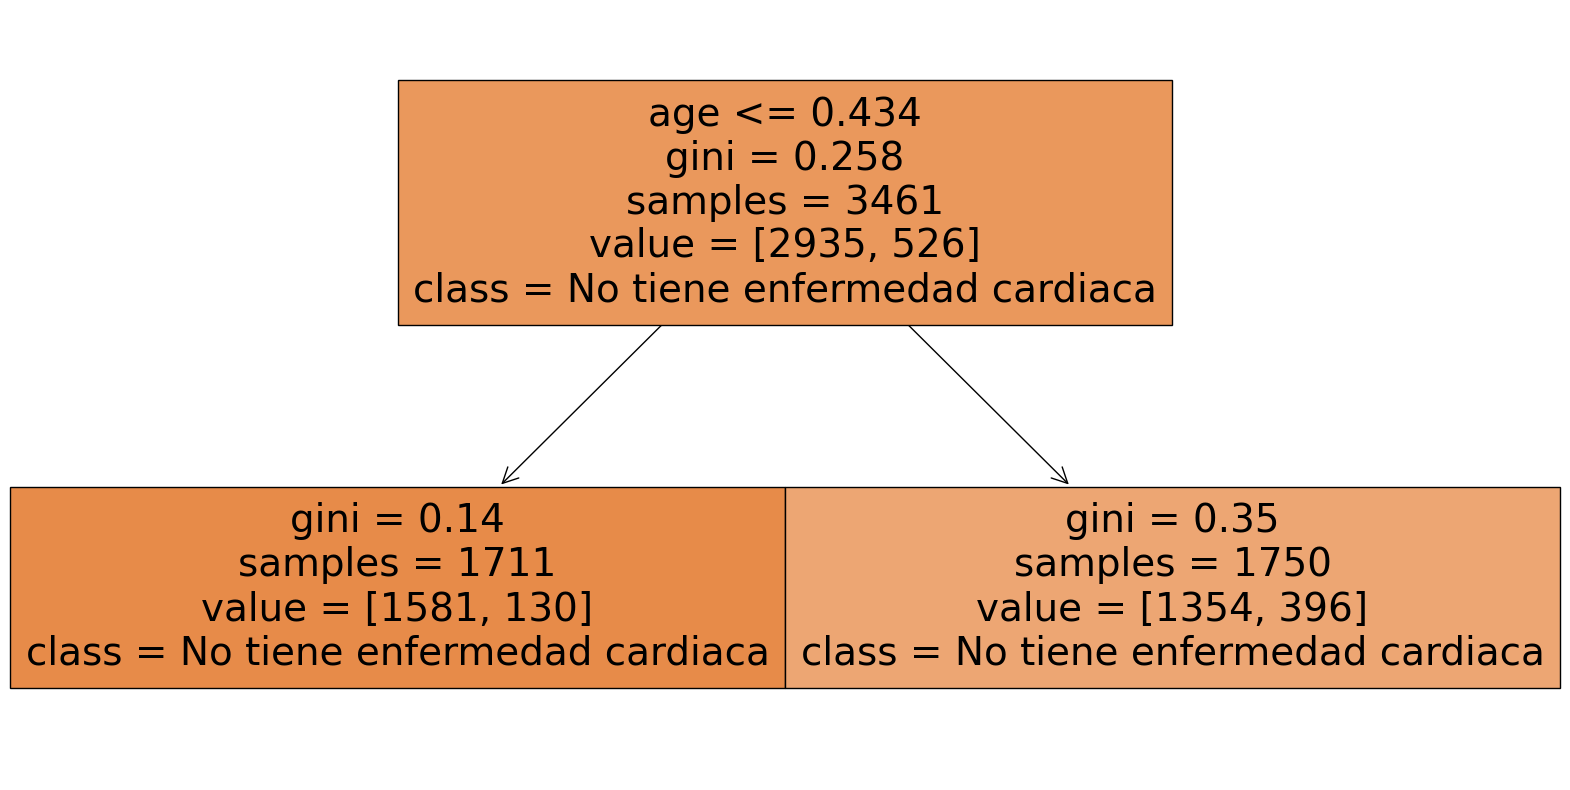

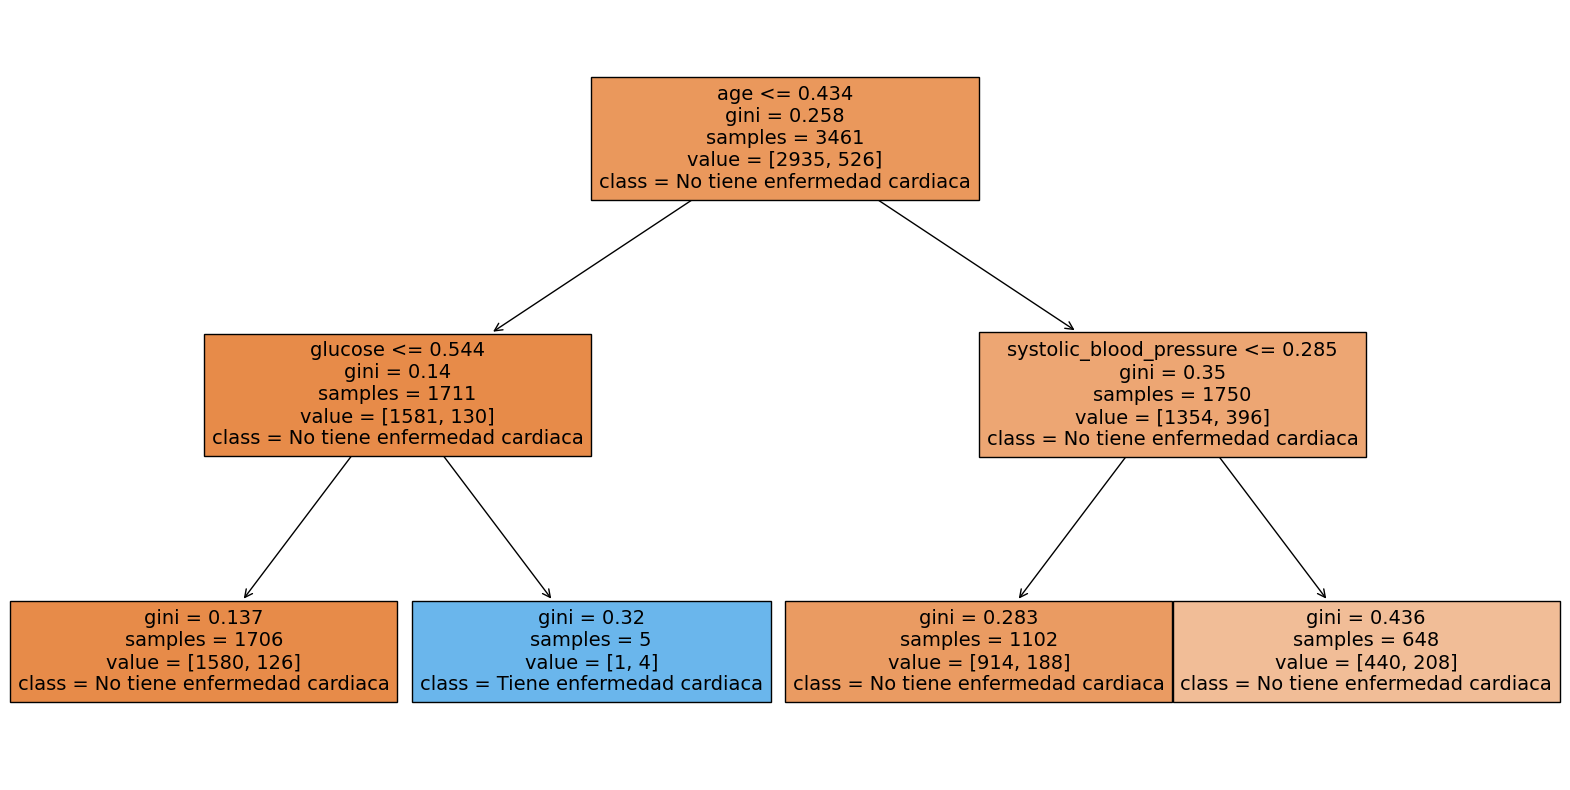

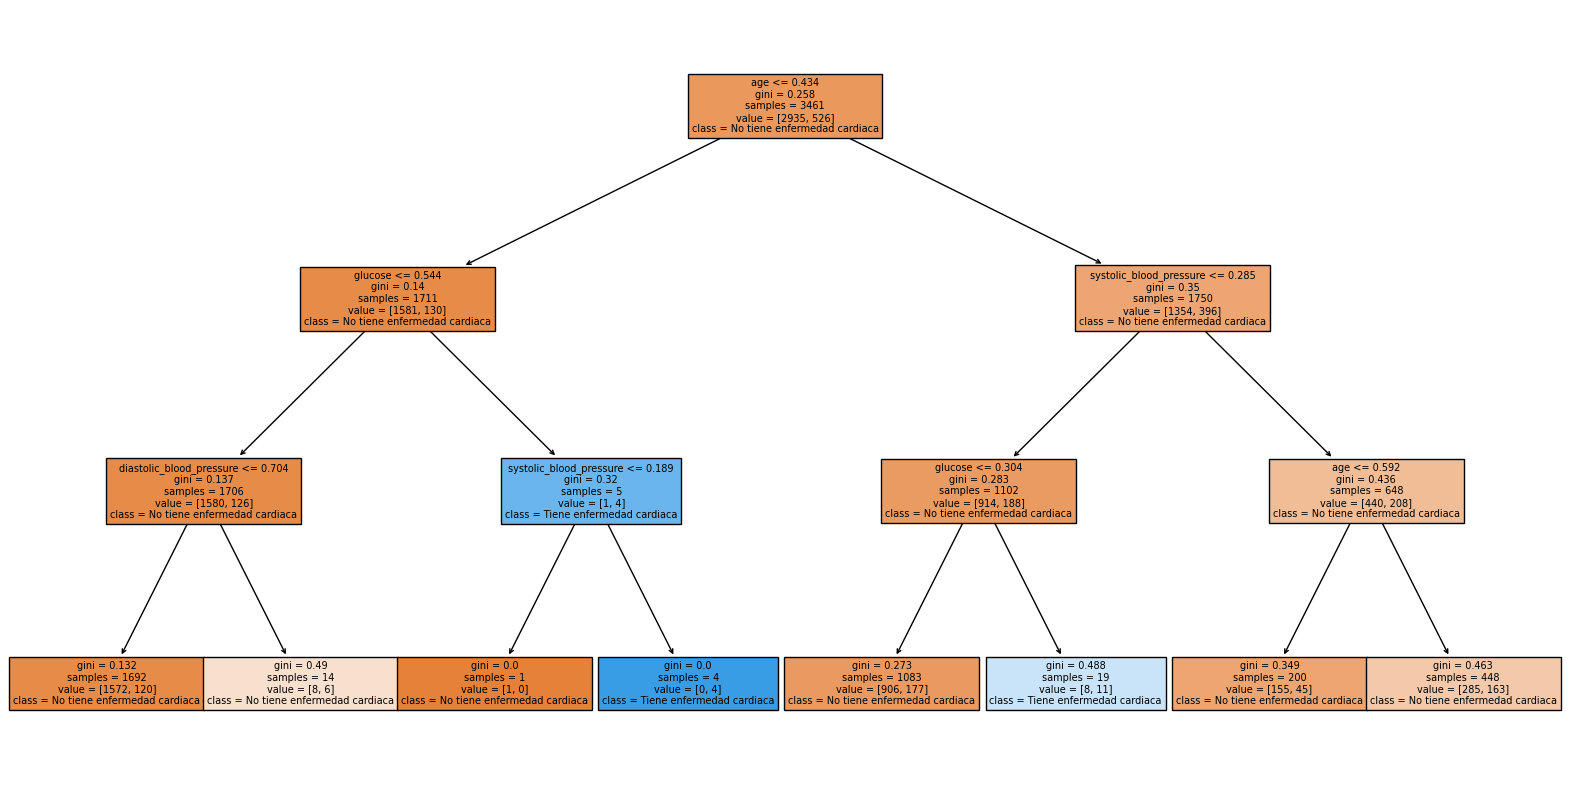

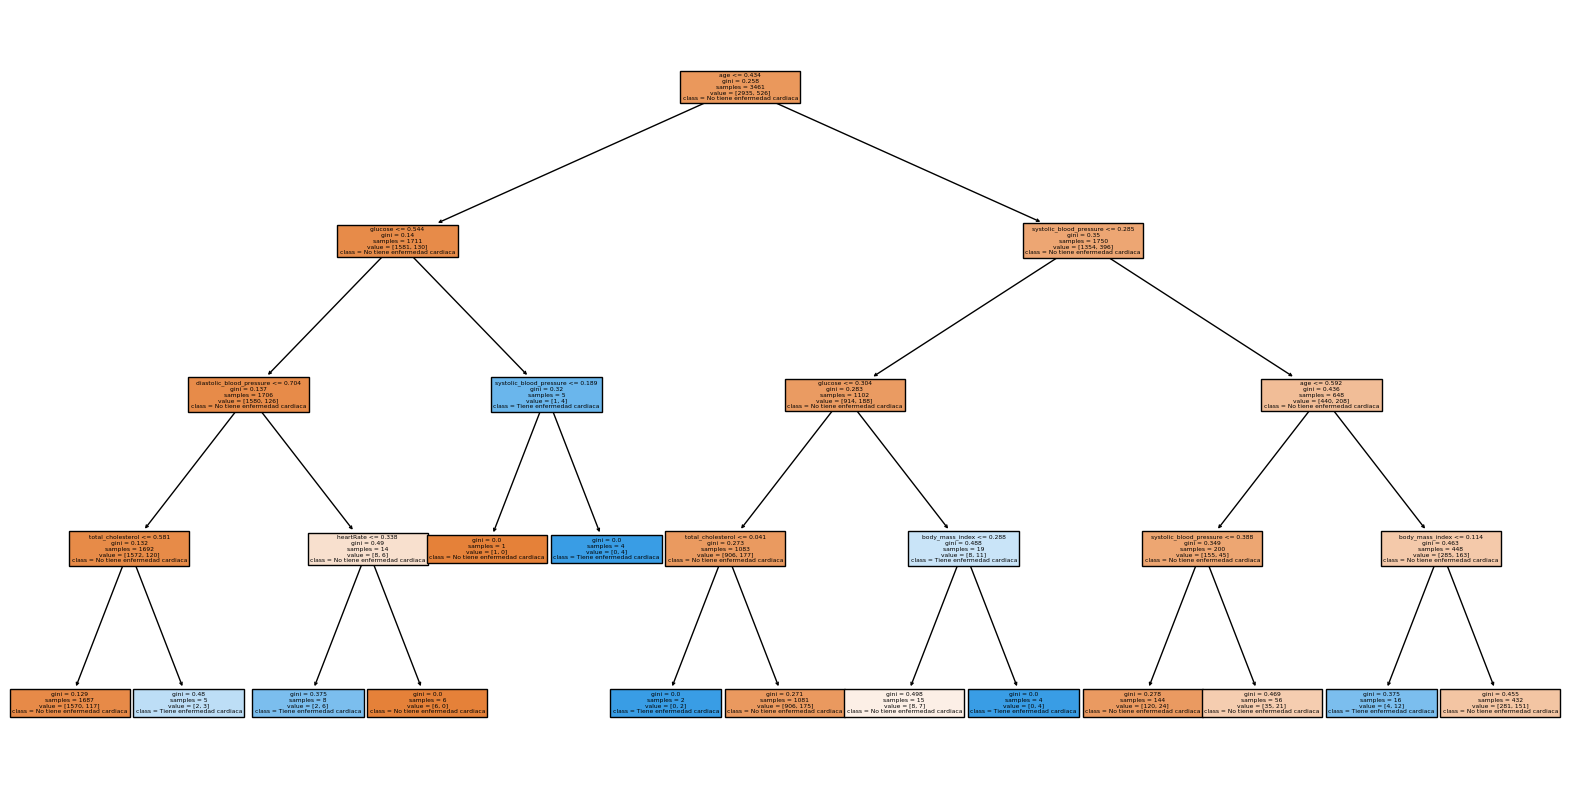

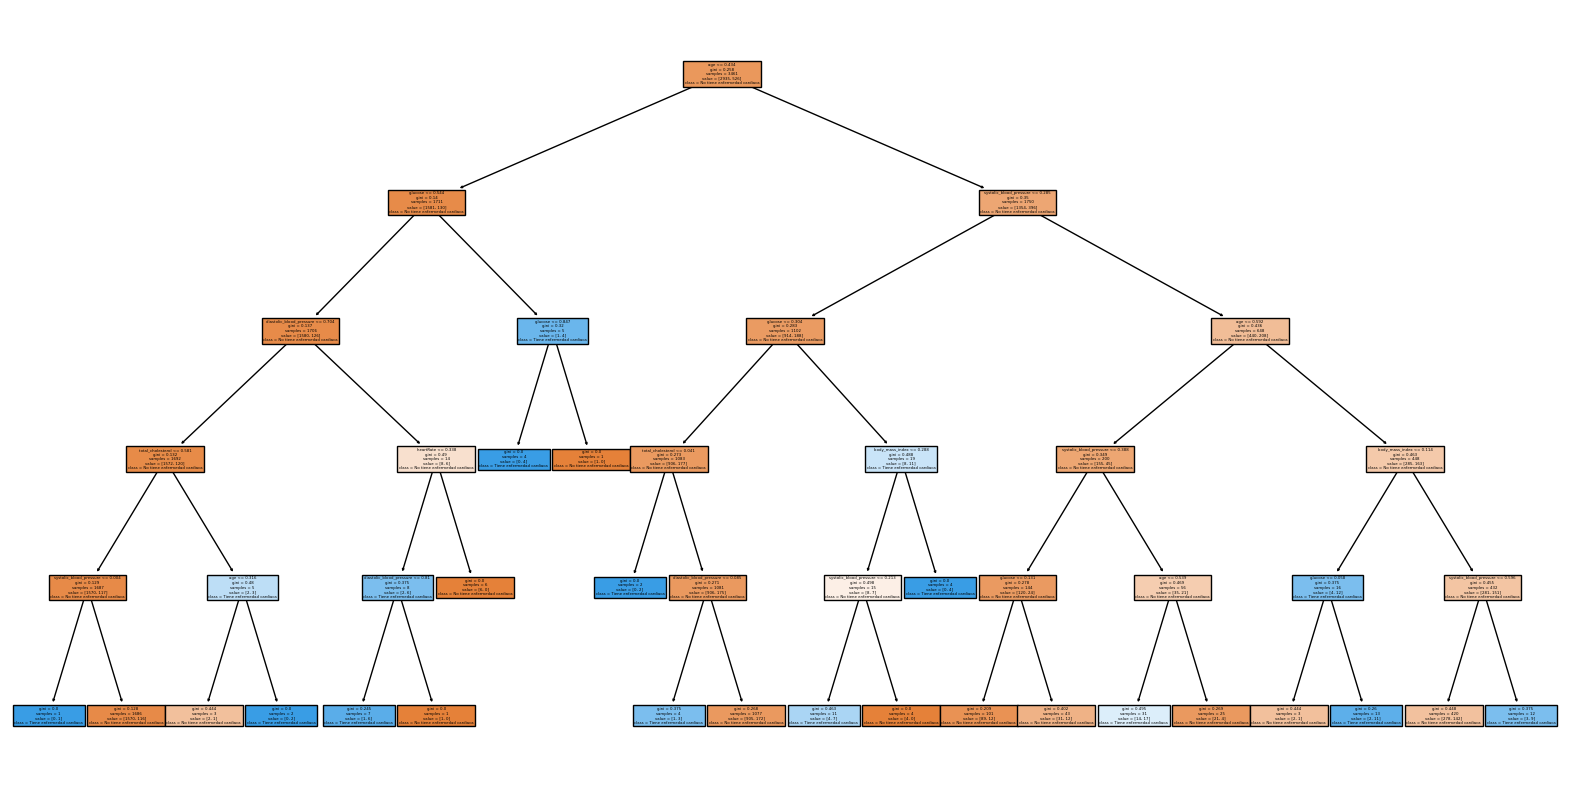

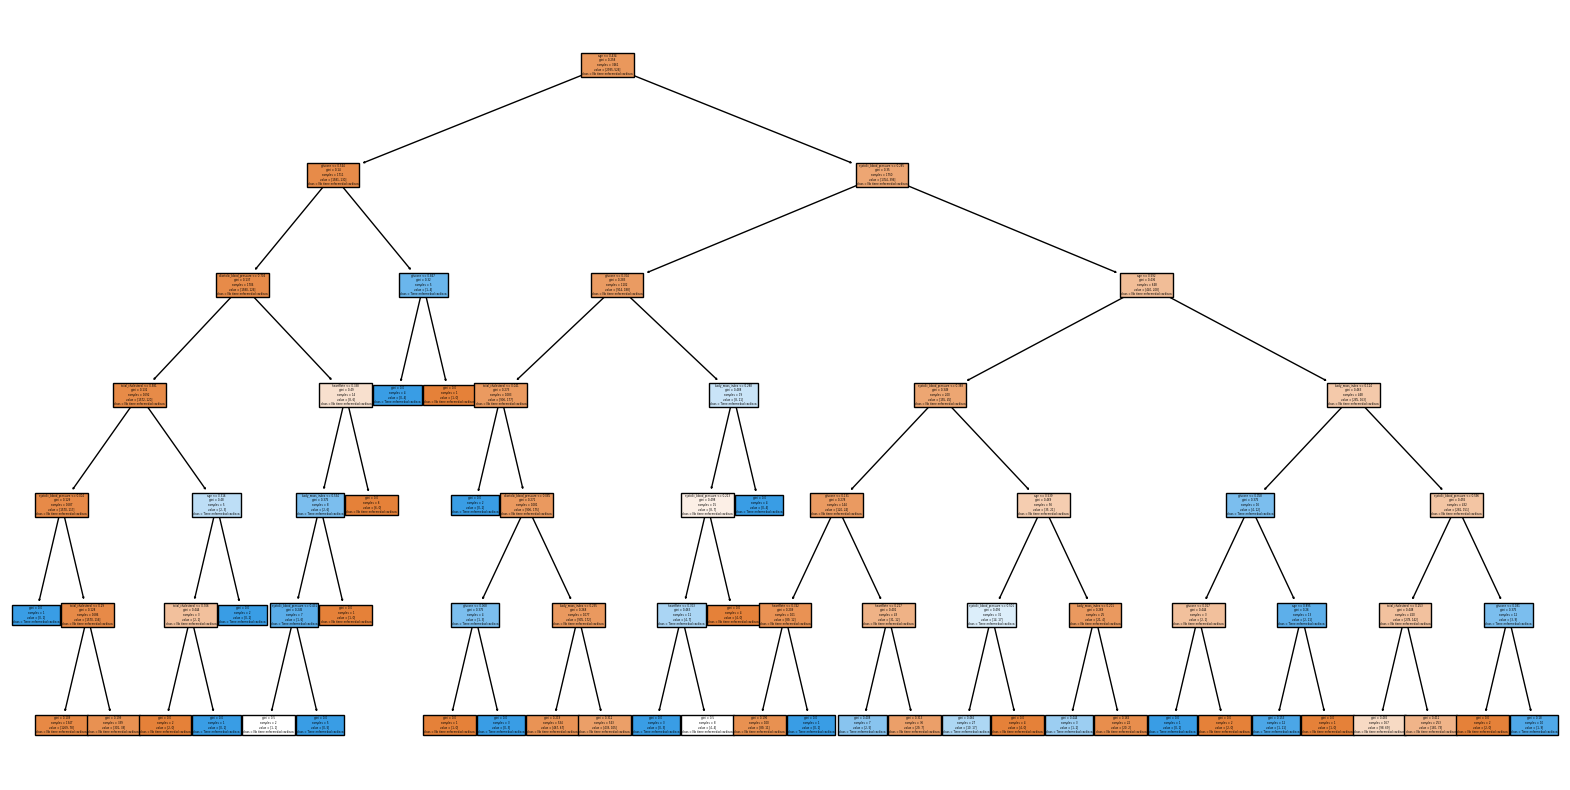

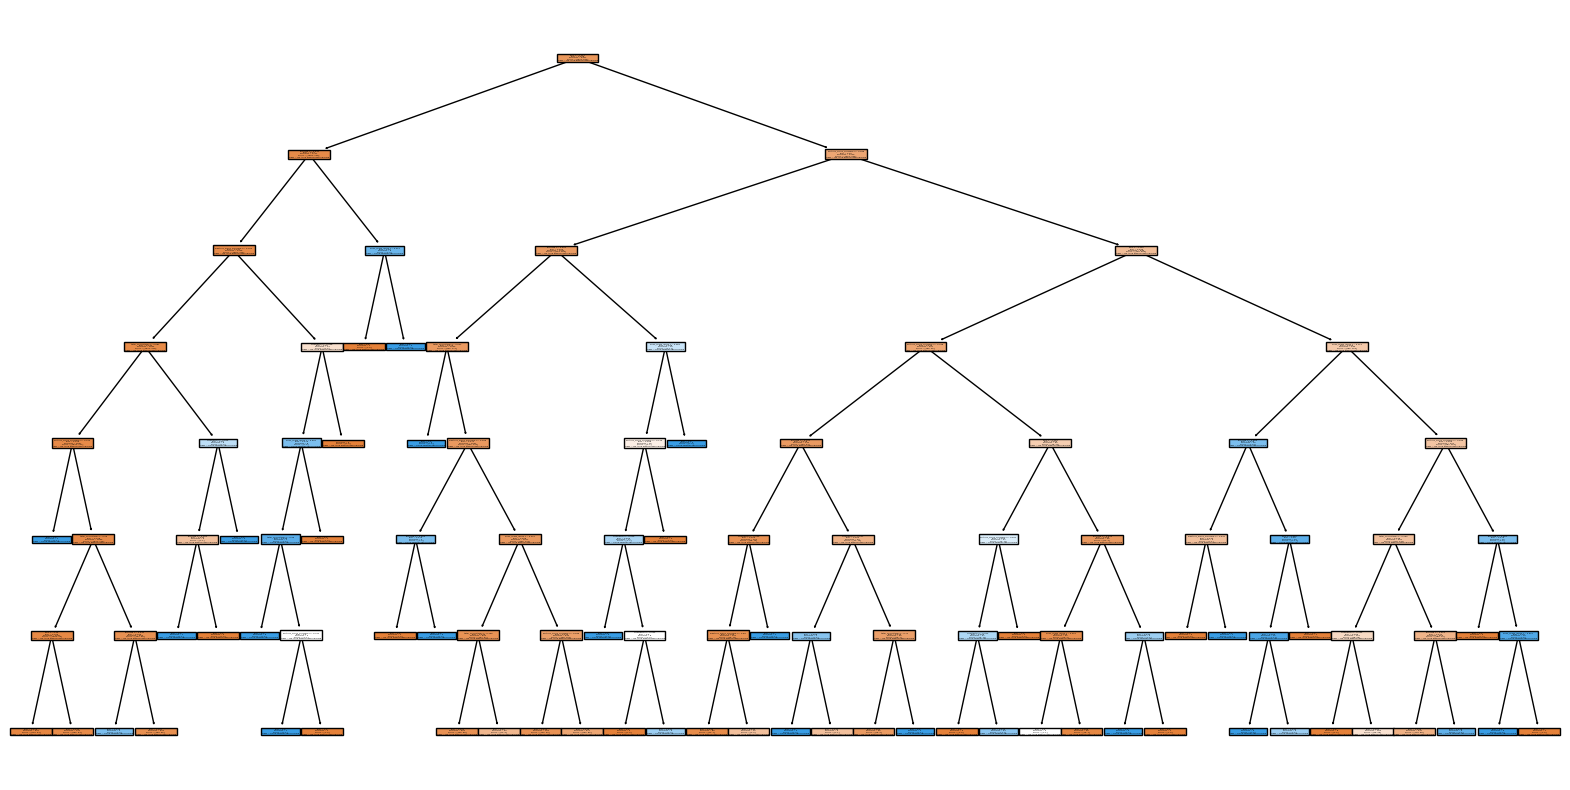

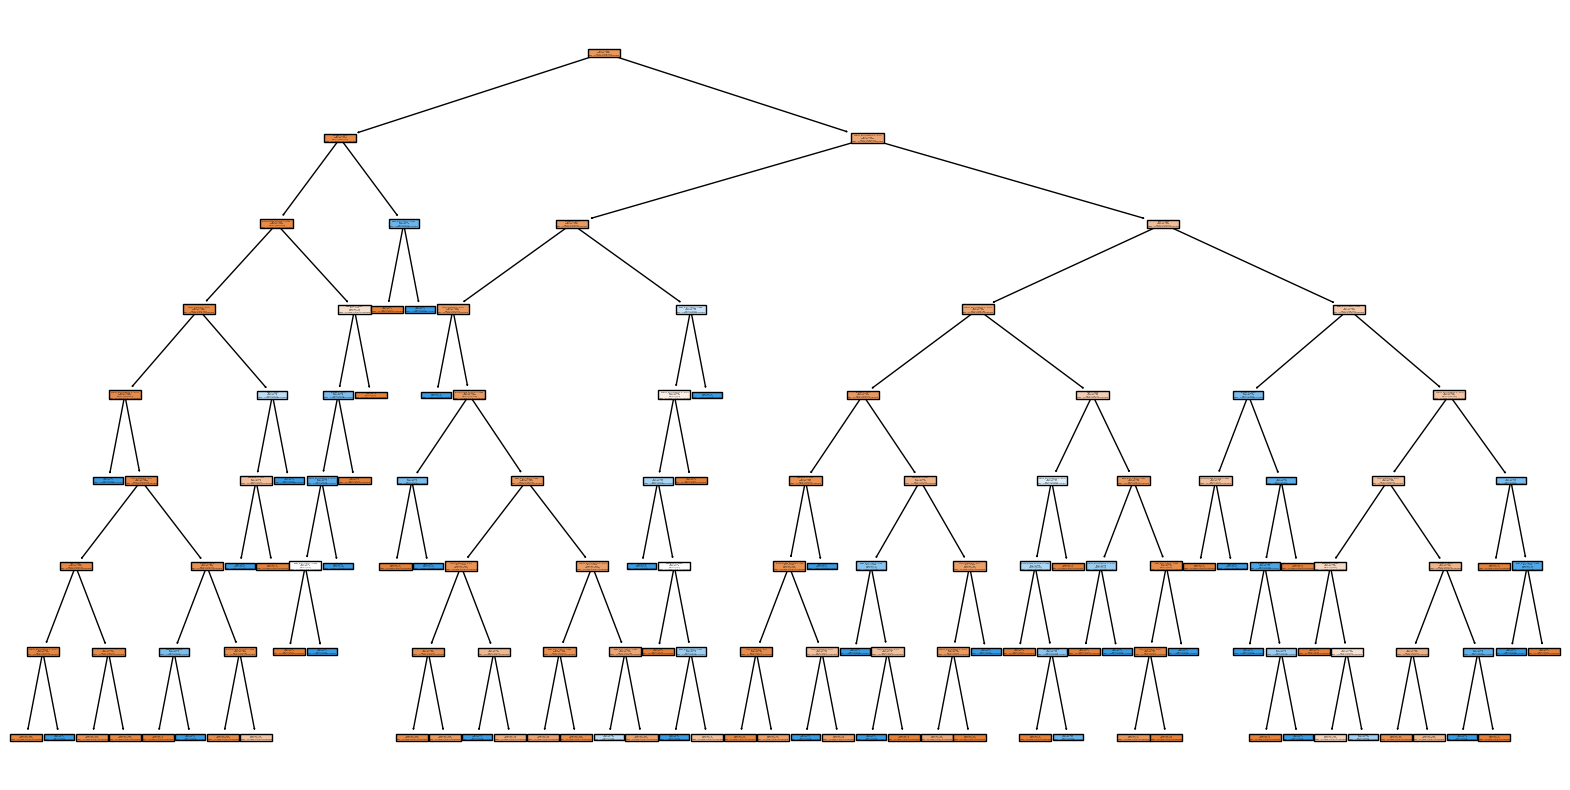

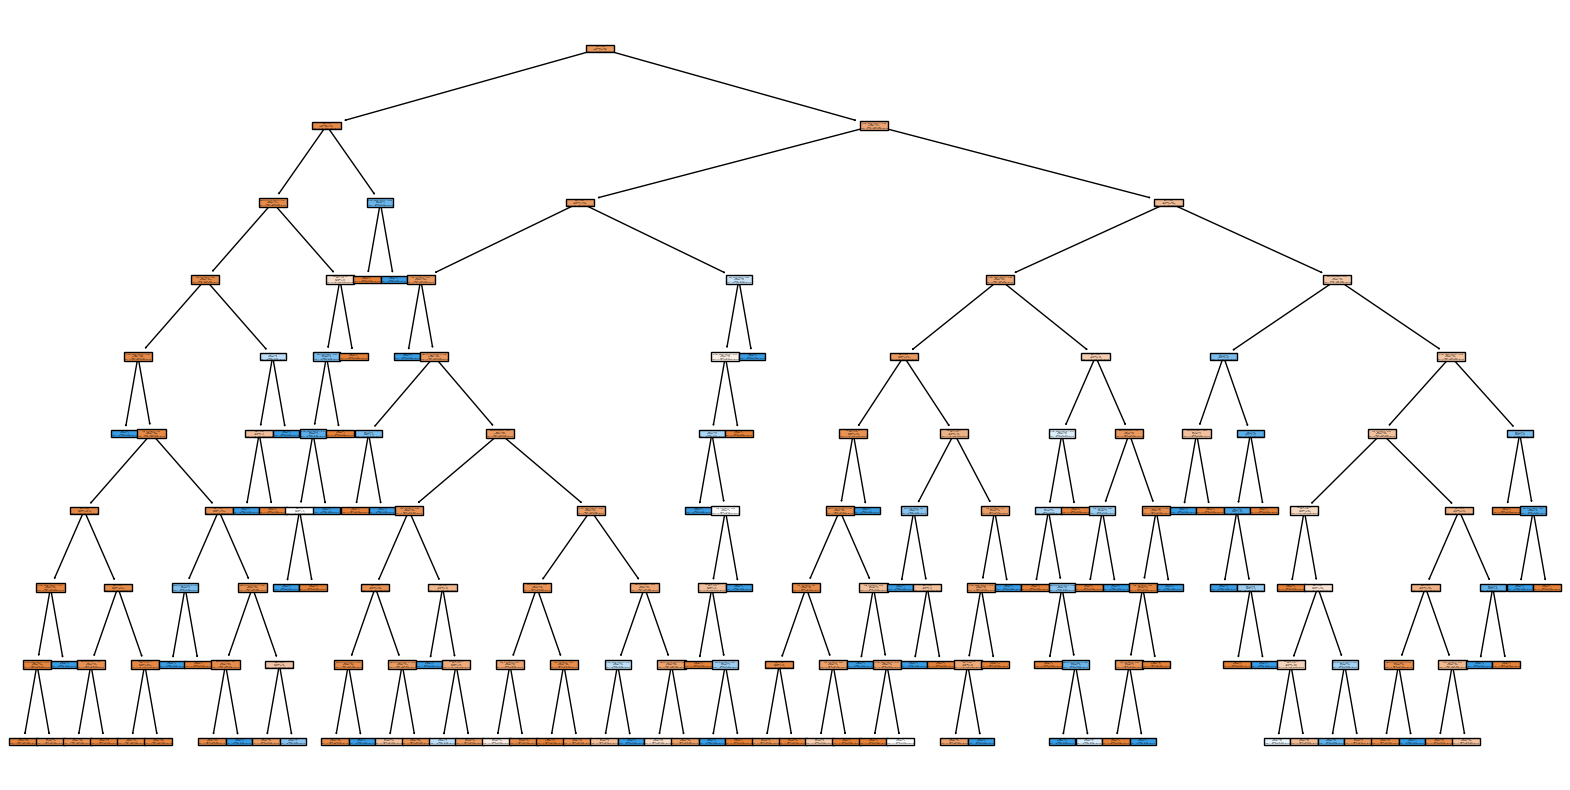

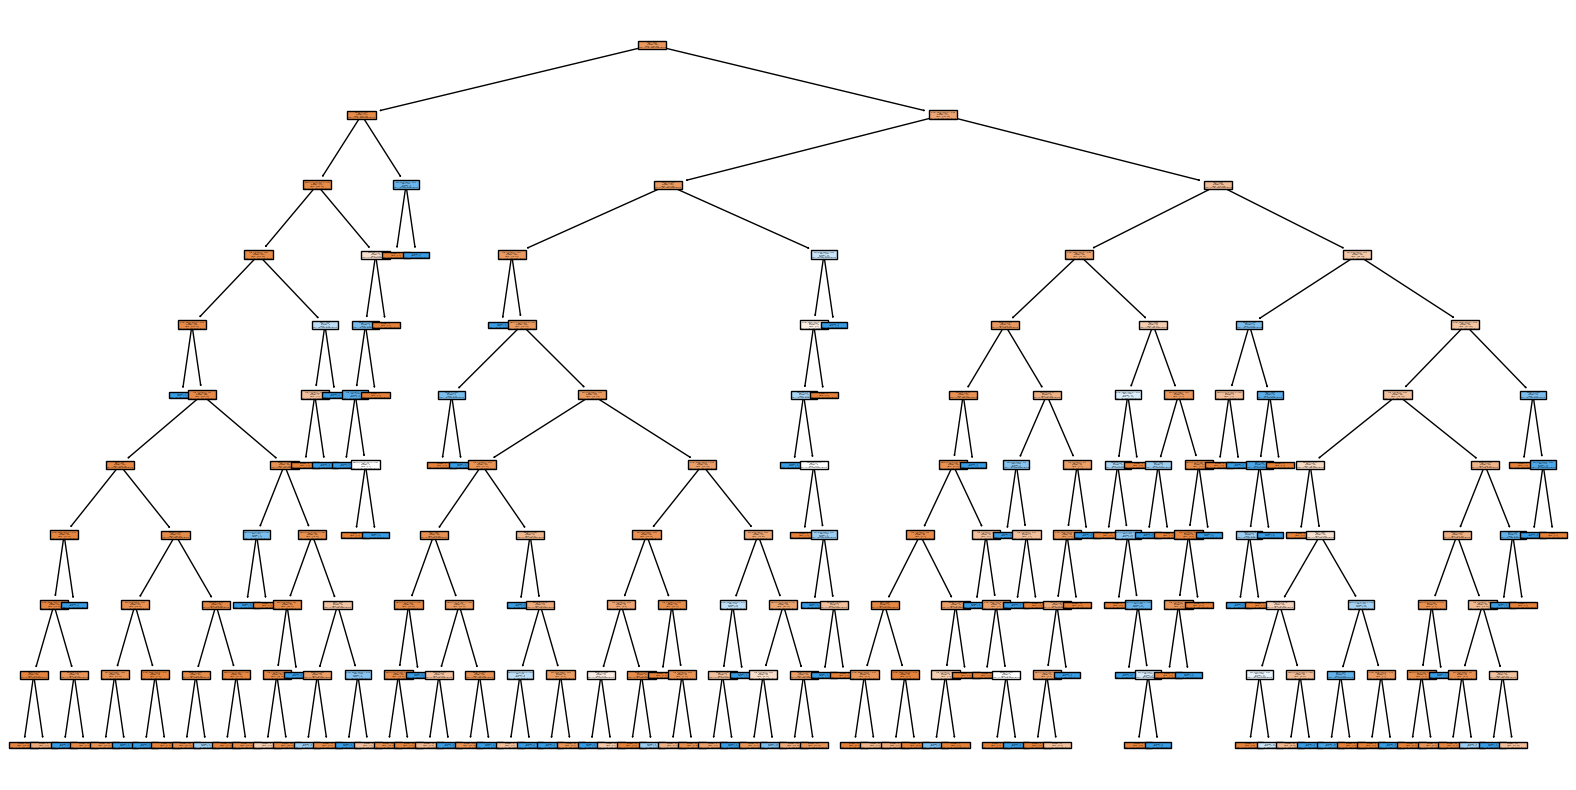

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Función para graficar un subárbol
def plot_subtree(estimator, max_depth, feature_names, class_names, filename):
    sub_estimator = tree.DecisionTreeClassifier(max_depth=max_depth)
    sub_estimator.fit(X, y)
    fig = plt.figure(figsize=(20,10))
    _ = tree.plot_tree(sub_estimator,
                       feature_names=feature_names,
                       class_names=class_names,
                       filled=True)
    fig.savefig(filename)
    plt.show()

# Graficar árboles de diferentes profundidades
for depth in range(1, 11):  # Ajusta el rango según sea necesario
    plot_subtree(estimator, depth, X.columns, ['No tiene enfermedad cardiaca', 'Tiene enfermedad cardiaca'], f"decision_tree_depth_{depth}.png")

In [ ]:
df_heart_modelizacion_nuevo.to_pickle('/content/drive/My Drive/BPA/TP/df_heart_modelizacion_nuevo_variables_actualizadas.pickle')

OPTIMIZACIÓN

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_heart_optimizacion = pd.read_pickle('/content/drive/My Drive/BPA/TP/df_heart_modelizacion_nuevo_variables_actualizadas.pickle')
df_heart_optimizacion

heart_disease_Yes   age  body_mass_index  diastolic_blood_pressure  \
0                     0 0.184            0.277                     0.233   
1                     0 0.421            0.238                     0.339   
2                     1 0.763            0.316                     0.497   
3                     0 0.368            0.183                     0.381   
4                     0 0.289            0.358                     0.656   
...                 ...   ...              ...                       ...   
3456                  0 0.684            0.228                     0.349   
3457                  1 0.947            0.184                     0.519   
3458                  1 0.474            0.253                     0.466   
3459                  0 0.500            0.101                     0.339   
3460                  0 0.526            0.144                     0.370   

      glucose  heartRate  systolic_blood_pressure  total_cholesterol  
0       0.105      0.364                    0.106              0.158  
1       0.085      0.313                    0.208              0.262  
2       0.178      0.212                    0.314              0.220  
3       0.127      0.414                    0.220              0.345  
4       0.167      0.333                    0.456              0.227  
...       ...        ...                      ...                ...  
3456    0.116      0.364                    0.272              0.141  
3457    0.110      0.162                    0.400              0.119  
3458    0.130      0.222                    0.452              0.403  
3459    0.079      0.212                    0.203              0.183  
3460    0.189      0.364                    0.236              0.312  

[3461 rows x 8 columns]

In [ ]:
X = df_heart_optimizacion.drop(['heart_disease_Yes'], axis = 1)
y = df_heart_optimizacion['heart_disease_Yes']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
algoritmo_rf = RandomForestClassifier()

GRID SEARCH

In [ ]:
grid_parameters =   { 'criterion'        : ['giny','entropy'], # Gini y entropy sirven medir la impureza de un nodo aleatoriamente
                      'max_depth'        : [10, 14, 20], #profundidad del arbol
                      'max_features'     : [10,20], #cantidad máxima de características que se consideran para dividir un nodo en un árbol de decisión
                      'min_samples_leaf' : [2, 4],  #número mínimo de muestras requeridas  para formar una hoja
                      'min_samples_split': [5, 10], #número mínimo de muestras requeridas para realizar una división en un nodo interno
                      'n_estimators'     : [100, 500], #Crear un clasificador de bosque aleatorio con N# estimadores
                      'n_jobs'           : [-1]} #(n_jobs) -1 para usar todos los núcleos disponibles

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search_rf = GridSearchCV(
                                      estimator           = algoritmo_rf,
                                      param_grid          = grid_parameters,
                                      scoring             = 'roc_auc',
                                      n_jobs              = -1,
                                      cv                  = 3,
                                      verbose             = 0
                                     )

In [ ]:
mejor_modelo_rf = grid_search_rf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

In [ ]:
print('Configuración de los mejores parámetros:')
mejor_modelo_rf.best_params_

Configuración de los mejores parámetros:


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500,
 'n_jobs': -1}

In [ ]:
print(f'Resultado de la métrica {mejor_modelo_rf.scoring} de la mejor configuración de parámetros:')

mejor_modelo_rf.best_score_

Resultado de la métrica roc_auc de la mejor configuración de parámetros:


0.6651980761193755

**PRESENTACIÓN DE RESULTADOS FINALES**

In [ ]:
#Modelo Final: Entrenar con los mejores parámetros a todo TRAIN
algoritmo_rf = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500, n_jobs=-1)
algoritmo_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500, n_jobs=-1)

In [ ]:
y_pred_rf_hy       = algoritmo_rf.predict(X_test)
y_pred_rf_proba_hy = algoritmo_rf.predict_proba(X_test)
y_pred_rf_proba_hy[:,1][:10]

array([0.14432537, 0.15713656, 0.2240986 , 0.06649744, 0.13366875,
       0.06578384, 0.47359307, 0.24350122, 0.2232925 , 0.02463556])

In [ ]:
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [ ]:
acc_rf_hy  = accuracy_score(y_test,y_pred_rf_hy)
f1_rf_hy   = f1_score(y_test,y_pred_rf_hy)
prec_rf_hy = precision_score(y_test, y_pred_rf_hy)
rec_rf_hy  = recall_score(y_test, y_pred_rf_hy)
auc_rf_hy  = roc_auc_score(y_test,y_pred_rf_proba_hy[:,1])

In [ ]:
resultsrf_hy = pd.DataFrame([['Random Forest Hyperparameters', acc_rf_hy,f1_rf_hy,prec_rf_hy,rec_rf_hy,auc_rf_hy]],
                       columns = ['Model','Accuracy','F1','Precision','Recall','AUC'])
resultsrf_hy

Model  Accuracy    F1  Precision  Recall   AUC
0  Random Forest Hyperparameters     0.863 0.128      0.583   0.072 0.721

In [ ]:
cm_rf_hy = confusion_matrix(y_test,y_pred_rf_hy)
print(cm_rf_hy)

[[591   5]
 [ 90   7]]
